<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/estudos_de_python_em_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @# markdown codigo é o ticker na B3. Data é ano/mes/dia.

codigo  = 'sapr11'       #@param {type:"string"}
inicio  = '2007-01-28'  #@param {type:"date"}
termino = '2023-08-08'  #@param {type:"date"}


usar_periodo = True #@param {type:"boolean"}
if usar_periodo :
  periodo = 'max' #@param ['1d','5d','1mo','3mo','6mo','1y','2y','3y','5y','10y','ytd','max']
#else: #periodo em anos
#  periodo = ((datetime.strptime(termino,'%Y-%m-%d') - datetime.strptime(inicio,'%Y-%m-%d')).days)/365
codigo = codigo.upper()

In [2]:
quandlkey = ''

In [3]:
#@markdown Importação do pacotes do python

import warnings
warnings.filterwarnings('ignore')

##import datetime
from datetime import datetime
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

!pip install -q googletrans==4.0.0rc1
from googletrans import Translator
translator = Translator()
from google.colab import data_table

try:
  import yfinance as yf
except:
  !pip install -q yfinance --upgrade
  import yfinance as yf
try:
  import quandl
except:
  !pip install -q quandl
  import quandl
finally:
  quandl.ApiConfig.api_key = quandlkey

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## sns
import seaborn as sns

## plotly
import plotly.graph_objs as go
from plotly.offline import iplot

## cufflinks connects plotly with pandas to create graphs and charts
## of dataframes directly
import cufflinks as cf
cf.go_offline()

from IPython.display import clear_output
clear_output()

IBr50 = ['RRRP3', 'ABEV3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBSE3', 'BBDC4',
    'BBAS3', 'BRFS3', 'BPAC11', 'CCRO3', 'CMIG4', 'CIEL3', 'CSAN3',
    'CYRE3', 'ELET3', 'ELET6', 'EMBR3', 'ENEV3', 'EQTL3', 'GGBR4',
    'NTCO3', 'HAPV3', 'HYPE3','ITSA4', 'ITUB4', 'JBSS3', 'KLBN11',
    'RENT3', 'LREN3', 'MGLU3','MRFG3', 'BEEF3', 'MULT3', 'PETR3',
    'PETR4', 'PRIO3', 'PETZ3', 'RADL3', 'RDOR3', 'RAIL3', 'SBSP3',
    'CSNA3', 'SUZB3', 'TOTS3', 'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3'
    ]

setor = [ 42 , 33 , 15 , 16 , 27 , 12 , 20 , 28 , 13 , 26 , 6 , 32 , 9
  , 39 , 35 , 17 , 34 , 40 , 24 , 5 , 10 , 7 , 8 , 23 , 2 , 41 , 1 , 38
  , 38 , 18 , 29 , 4 , 19 , 36 , 11 , 37 , 3 , 21 , 21 , 43 , 30 , 31 ,
  14 , 22 , 25 , ]

# try:
#    import fundamentus
# except:
#    !pip install -q fundamentus
#    import fundamentus

# for x in setor :
#   if codigo in  fundamentus.list_papel_setor(x) :
#     IBr50 = fundamentus.list_papel_setor(x)



In [4]:
#@markdown RENDERIZAÇÂO DE GRAFICOS

meio = 'jpg' #@param ['svg', 'colab' , 'jpg']



import plotly.io
#@markdown uso o 'svg' pra enviar para o github,
#@markdown porem perde o modo interativo
plotly.io.renderers.default = meio

if meio != 'colab' :
  !pip install -q kaleido
  import kaleido

In [5]:
plotly.io.renderers

Renderers configuration
-----------------------
    Default renderer: 'jpg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [6]:
#@markdown A empresa e Indicadores fundamentalistas via fundamentus.com.br

tk_info = yf.Ticker(codigo+".sa")
info = tk_info.get_info()
# info
L52 = info['fiftyTwoWeekLow']
H52 = info['fiftyTwoWeekHigh']
HP = info['targetHighPrice']
LP = info['targetLowPrice']
MP = info['targetMeanPrice']
mP = info['targetMedianPrice']
rec = translator.translate(info['recommendationKey'], dest='pt').text
nAnal = info['numberOfAnalystOpinions']
message = (
     f"De acordo com o yahoo finance, dentre {nAnal} analistas, "
     f"o menor preço-alvo é {LP}, "
     f"o maior {HP},"
     f"o preço alvo médio é {MP}, a mediana {mP}. "
     f'A recomentação é "{rec}".'
     f'Nas últimas 52 semanas o maior preço foi {H52} e o menor {L52}.'
)

print(codigo)
import textwrap
print("\n".join(textwrap.wrap(translator.translate(info['longBusinessSummary'], dest='pt').text,118)))

print("\n".join(textwrap.wrap(message,118)))

import requests
#pra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

url = 'https://www.fundamentus.com.br/resultado.php'


#junta com a requests
r = requests.get(url, headers=header)
# read_html do pandas põe a tabela num dataframe
funds = pd.read_html(r.text, decimal=',', thousands='.')
dfunds = pd.DataFrame(funds[0])

(dfunds.loc[dfunds['Papel']==codigo]).set_index('Papel')

SAPR11
Companhia de Saneração do Paraná - SANEPAR fornece serviços de saneamento no Brasil.A empresa está envolvida no
tratamento e distribuição de água;e coleta e tratamento de esgoto e resíduos sólidos, bem como estudos, projetos e
obras de construção de instalações.Também oferece serviços de assistência consultiva e técnica para atividades
relacionadas.A empresa fornece serviços sanitários em 325 municípios de Paraná e Santa Catarina.Serve agências
federais, estaduais, municipais e outras entidades.A empresa foi fundada em 1963 e está sediada em Curitiba, Brasil.
De acordo com o yahoo finance, dentre 9 analistas, o menor preço-alvo é 19.0, o maior 29.0,o preço alvo médio é 23.78,
a mediana 23.0. A recomentação é "segurar".Nas últimas 52 semanas o maior preço foi 23.4 e o menor 16.28.


,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
Papel,,,,,,,,,,,,,,,,,,,,
SAPR11,22.58,4.99,0.75,1.157,"8,12%",0.385,8.22,2.77,-1.14,4.57,3.86,"41,83%","23,19%",1.47,"15,20%","15,03%",17482700.0,9.100570e+09,0.62,"7,45%"


In [7]:
#@markdown A empresa e Indicadores fundamentalistas via statusinvest.com.br (pode ter atraso)

pd.set_option('display.max_columns', None)


fundsSI = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/statusinvest-busca-avancada.csv',
                      sep=';' , decimal=',' ,thousands ='.' )
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')

,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
TICKER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SAPR11,22.77,8.06,5.03,0.76,0.39,60.18,34.84,23.19,3.35,5.58,2.17,0.49,1.17,8.29,-0.46,1.47,15.03,7.72,10.93,0.51,0.49,0.33,7.96,14.79,20316338.85,30.11,4.52,0.23,7.005949e+09


In [8]:
#@markdown Empresas do mesmo setor
def get_setor_data(setor=None):

    url = 'http://www.fundamentus.com.br/resultado.php?setor={}'.format(setor)

    content = requests.get(url, headers=header)


    ## parse + load
    df = pd.read_html(content.text, decimal=",", thousands='.')[0]

    ##
    return list(df['Papel'])

def list_setor():
    from tabulate import tabulate
    print( tabulate(df, headers=['label','desc','id'], tablefmt='presto') )
    return None

setores = [ 1 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 2 ,
    20 , 21 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 3 , 30 , 31
    , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 4 , 40 , 41 , 42 , 43 , 5
    , 6 , 7 , 8 , 9 ]

## Setores:
setor = [
   [ 'agro'            , 'Agropecuária'                       , 42 ] ,
   [ 'saneamento'      , 'Água e Saneamento'                  , 33 ] ,
   [ 'alimentos'       , 'Alimentos'                          , 15 ] ,
   [ 'bebidas'         , 'Bebidas'                            , 16 ] ,
   [ 'com1'            , 'Comércio'                           , 27 ] ,
   [ 'com2'            , 'Comércio'                           , 12 ] ,
   [ 'com3'            , 'Comércio e Distribuição'            , 20 ] ,
   [ 'computadores'    , 'Computadores e Equipamentos'        , 28 ] ,
   [ 'construcao'      , 'Construção e Engenharia'            , 13 ] ,
   [ 'engenharia'      , 'Construção e Engenharia'            , 13 ] ,
   [ 'diversos'        , 'Diversos'                           , 26 ] ,
   [ 'embalagens'      , 'Embalagens'                         , 6  ] ,
   [ 'energia'         , 'Energia Elétrica'                   , 32 ] ,
   [ 'equipamentos'    , 'Equipamentos Elétricos'             , 9  ] ,
   [ 'imoveis'         , 'Exploração de Imóveis'              , 39 ] ,
   [ 'financeiro'      , 'Financeiros'                        , 35 ] ,
   [ 'fumo'            , 'Fumo'                               , 17 ] ,
   [ 'gas'             , 'Gás'                                , 34 ] ,
   [ 'holdings'        , 'Holdings Diversificadas'            , 40 ] ,
   [ 'hoteis'          , 'Hoteis e Restaurantes'              , 24 ] ,
   [ 'restaurantes'    , 'Hoteis e Restaurantes'              , 24 ] ,
   [ 'papel'           , 'Madeira e Papel'                    , 5  ] ,
   [ 'maquinas'        , 'Máquinas e Equipamentos'            , 10 ] ,
   [ 'materiais'       , 'Materiais Diversos'                 , 7  ] ,
   [ 'transporte'      , 'Material de Transporte'             , 8  ] ,
   [ 'midia'           , 'Mídia'                              , 23 ] ,
   [ 'mineracao'       , 'Mineração'                          , 2  ] ,
   [ 'outros'          , 'Outros'                             , 41 ] ,
   [ 'petroleo'        , 'Petróleo, Gás e Biocombustíveis'    , 1  ] ,
   [ 'previdencia'     , 'Previdência e Seguros'              , 38 ] ,
   [ 'seguros'         , 'Previdência e Seguros'              , 38 ] ,
   [ 'usopessoal'      , 'Prods. de Uso Pessoal e de Limpeza' , 18 ] ,
   [ 'limpeza'         , 'Prods. de Uso Pessoal e de Limpeza' , 18 ] ,
   [ 'programas'       , 'Programas e Serviços'               , 29 ] ,
   [ 'quimicos'        , 'Químicos'                           , 4  ] ,
   [ 'saude'           , 'Saúde'                              , 19 ] ,
   [ 'securitizadoras' , 'Securitizadoras de Recebíveis'      , 36 ] ,
   [ 'servicos'        , 'Serviços'                           , 11 ] ,
   [ 'finandiversos'   , 'Serviços Financeiros Diversos'      , 37 ] ,
   [ 'siderurgia'      , 'Siderurgia e Metalurgia'            , 3  ] ,
   [ 'tecidos'         , 'Tecidos, Vestuário e Calçados'      , 21 ] ,
   [ 'vestuario'       , 'Tecidos, Vestuário e Calçados'      , 21 ] ,
   [ 'telecom'         , 'Telecomunicações'                   , 43 ] ,
   [ 'telefoniafixa'   , 'Telefonia Fixa'                     , 30 ] ,
   [ 'telefoniamovel'  , 'Telefonia Móvel'                    , 31 ] ,
   [ 'transporte'      , 'Transporte'                         , 14 ] ,
   [ 'utilidades'      , 'Utilidades Domésticas'              , 22 ] ,
   [ 'viagens'         , 'Viagens e Lazer'                    , 25 ] ,
]


# list_setor()

for id in setores :
  IBr50=get_setor_data(id)
  if (len(IBr50)>0 and codigo in IBr50) : break

print(*IBr50)

AMBP3 ORVR3 SAPR3 SAPR11 SAPR4 CSMG3 SBSP3


Download dos preços

In [9]:
#@ markdown Download dos dados do ativo(s) e do índice

ativo = pd.DataFrame()
ibov = pd.DataFrame()
if usar_periodo :
  ativo = yf.download(codigo+'.SA', period = periodo , actions=True , progress = False)
  ibov = yf.download('^BVSP', period = periodo , actions=True , progress = False)
  ibov = ibov.loc[ativo.index[0]:]
else :
  ativo = yf.download(codigo+'.SA' , start=inicio , end=termino , actions=True ,  progress = False)
  ibov = yf.download('^BVSP', start=inicio , end=termino , actions=True, progress = False)

Dividendos no período

In [10]:
proventos = ativo['Dividends'][ativo['Dividends']!=0]

print(proventos.count() , 'proventos pagos no período, total R$', round(ativo['Dividends'].sum(),2))
#if ativo['Stock Splits'].sum() == 0 :
print('provento medio R$', round(proventos.mean(),2), end=(', '))

15 proventos pagos no período, total R$ 7.58
provento medio R$ 0.51, 

In [11]:
print('Distribuição anual')
yanual = proventos.groupby(pd.Grouper(freq='Y')).sum()
print('provento medio R$', round(yanual.mean(),2), end=(', '))
print('preço fechamento médio R$', round(ativo['Adj Close'].mean(),2), end=(', '))
print('DY por essas médias (%)', round(100*yanual.mean()/ativo['Adj Close'].mean(),2))
yanual

Distribuição anual
provento medio R$ 1.26, preço fechamento médio R$ 18.23, DY por essas médias (%) 6.93


Date
2018-12-31    1.090132
2019-12-31    1.469591
2020-12-31    1.028218
2021-12-31    0.994352
2022-12-31    1.161391
2023-12-31    1.833332
Freq: A-DEC, Name: Dividends, dtype: float64

In [12]:
yanual.describe()

count    6.000000
mean     1.262836
std      0.327249
min      0.994352
25%      1.043696
50%      1.125762
75%      1.392541
max      1.833332
Name: Dividends, dtype: float64

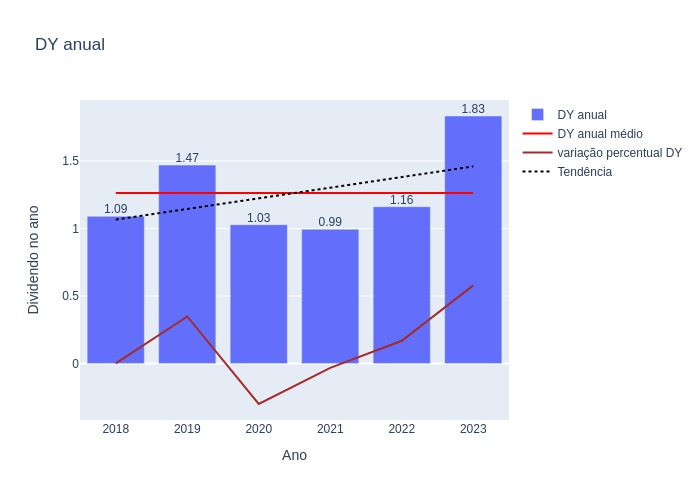

In [13]:
df_m, df_b = np.polyfit(yanual.index.year, yanual.values, 1)

fig = go.Figure()

fig.add_trace(go.Bar(name='DY anual',
    x=yanual.index.year,
    y=yanual.values
))

fig.add_trace(go.Scatter(
    x=yanual.index.year,
    y=yanual.values,
    text= yanual.values.round(decimals=2),
    mode='text',
    textposition='top center',
    textfont=dict(
        size=12,
    ),
    showlegend=False
))


fig.add_trace(go.Scatter(name='DY anual médio',
    x=yanual.index.year,
    y=[yanual.values.mean()]*len(yanual.index.year),
    mode='lines',
    line = dict(color = 'red' , width=2)
))

fig.add_trace(go.Scatter(name='variação percentual DY',
    x=yanual.index.year,
    y=yanual.pct_change().fillna(0),
    mode='lines',
    marker = dict(color = 'brown')
))

fig.add_trace(go.Scatter(name='Tendência',
    x=yanual.index.year,
    y=df_m*yanual.index.year+df_b,
    mode='lines',
    line = dict(color = 'black', dash='dot')
))

fig.update_layout(title= "DY anual")
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Dividendo no ano")

fig.show()

# preço


In [14]:
qual_preco = 'Adj Close' #@param ['Open','High','Close','Low','Adj Close']


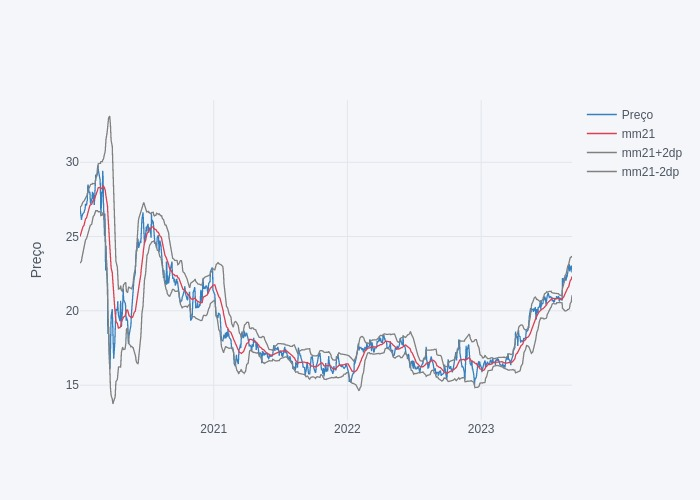

In [15]:

preco = pd.DataFrame()
preco['Preço'] = ativo[qual_preco]
preco['ibov'] = ibov[qual_preco]
preco['mm21'] = preco['Preço'].rolling(21).mean()
Mov_SD = preco['Preço'].rolling(21).std(ddof=0)
preco['mm21+2dp'] = preco['mm21'] + 2*Mov_SD
preco['mm21-2dp'] = preco['mm21'] - 2*Mov_SD
preco.loc['2020':].iplot(keys = ['Preço','mm21','mm21+2dp','mm21-2dp'], yTitle='Preço' ,
            colors=['blue','red','gray','gray'])

In [16]:
# if len(ativo>200) :
#   qf=cf.QuantFig(ativo[-200:],title=codigo,legend='top',name='GS',up_color='green', down_color='red' )
#   qf.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True)
#   qf.add_ema(periods=5)
#   qf.add_rsi(periods=2,color='red',rsi_upper=95,rsi_lower=5,showbands=True)
#   qf.add_macd(fast_period=9,slow_period=21,signal_period=3)
#   qf.add_resistance(date='2023-02-17', on='close', color='orange')

#   fig = qf.figure()
#   fig.update_xaxes(
#       rangebreaks=[dict(bounds=["sat", "mon"])])
#   fig.show()

###simulação
via [movimento browniano geométrico](https://pt.wikipedia.org/wiki/Movimento_browniano_geom%C3%A9trico) (GBM)

In [17]:
n_dias =         10#@param {type:"integer"}
n_grafico =  2*n_dias
n_cenarios =    500#@param {type:"integer"}

In [18]:
s_media     = (np.log(preco['Preço']/preco['Preço'].shift(1))).mean()
s_variancia = (np.log(preco['Preço']/preco['Preço'].shift(1))).var()
s_desvio_padrao = s_variancia**.5
## simula movimento browniano geométrico (MBG)
Z = stats.norm.ppf(np.random.rand(n_dias,n_cenarios))
retornos_diarios = np.exp((s_media - (0.5 * s_variancia)) + s_desvio_padrao * Z)
previsoes = np.zeros_like(a = np.arange(n_grafico*n_cenarios),dtype=float,shape=(n_grafico,n_cenarios))

for dia in range(n_grafico) :
  if dia < (n_grafico - n_dias) :
    previsoes[dia] = preco['Preço'].tail(n_grafico - n_dias).values[dia]
  else :
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia - (n_grafico-n_dias)]

cenarios = pd.DataFrame()
for i in range(len(previsoes.T)):
  cenarios['cenario'+str(i)] = previsoes.T[i]


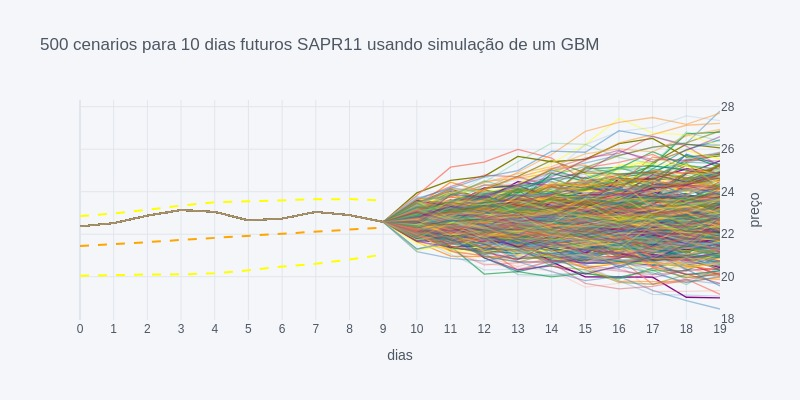

In [19]:
fig = cenarios.iplot(asFigure=True)

titulo = str(n_cenarios)+' cenarios para '+str(n_dias)+' dias futuros '+codigo+ ' usando simulação de um GBM'
layout = go.Layout(title=titulo,
                   yaxis={'title' : 'preço' , 'side' : 'right'},
                   xaxis={'title' : 'dias' , 'dtick' : 1 })


fig.update_layout(layout,showlegend=False,width=800,height=400)

fig.add_trace(go.Scatter(name='mm21',
                         x=pd.Series(range(n_grafico-n_dias)) ,
                         y= preco['mm21'][-(n_grafico-n_dias):].values,
                         mode='lines', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(name='upper BB',
                         x=pd.Series(range(n_grafico-n_dias)) ,
                         y= preco['mm21+2dp'][-(n_grafico-n_dias):].values,
                         mode='lines', line=dict(color='yellow', dash='dash')))
fig.add_trace(go.Scatter(name='lower BB',
                         x=pd.Series(range(n_grafico-n_dias)) ,
                         y= preco['mm21-2dp'][-(n_grafico-n_dias):].values,
                         mode='lines',line=dict(color='yellow', dash='dash')))


fig.show()

intervalo de confiança para preços na  simulação


In [20]:
alfa=0.95

for i in range(n_dias):
  print('dia'+str(i+1)+': '+str(round(alfa*100))+'% -' , end='')
  print(stats.norm.interval(alpha=alfa, loc=np.mean(previsoes[n_grafico - n_dias +i]), scale=stats.sem(previsoes[n_grafico - n_dias +i])),end=', 99% - ')
  print(stats.norm.interval(alpha=0.95, loc=np.mean(previsoes[n_grafico - n_dias +i]), scale=stats.sem(previsoes[n_grafico - n_dias +i])))


dia1: 95% -(22.563152997805894, 22.64373602260123), 99% - (22.563152997805894, 22.64373602260123)
dia2: 95% -(22.597535688795492, 22.713217547147902), 99% - (22.597535688795492, 22.713217547147902)
dia3: 95% -(22.577002046176432, 22.71687806040979), 99% - (22.577002046176432, 22.71687806040979)
dia4: 95% -(22.55578937525435, 22.719000309519075), 99% - (22.55578937525435, 22.719000309519075)
dia5: 95% -(22.560363544492947, 22.747975843732252), 99% - (22.560363544492947, 22.747975843732252)
dia6: 95% -(22.5525525588216, 22.75927421016831), 99% - (22.5525525588216, 22.75927421016831)
dia7: 95% -(22.572587139067394, 22.798643323811298), 99% - (22.572587139067394, 22.798643323811298)
dia8: 95% -(22.56449586223927, 22.80623198184368), 99% - (22.56449586223927, 22.80623198184368)
dia9: 95% -(22.583100941613374, 22.838400920751077), 99% - (22.583100941613374, 22.838400920751077)
dia10: 95% -(22.59940138027979, 22.86676562212966), 99% - (22.59940138027979, 22.86676562212966)


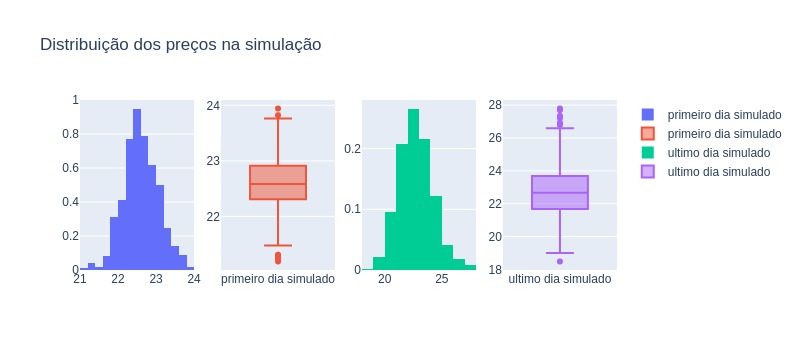

In [21]:
title='Distribuição dos preços na simulação'

from plotly.subplots import make_subplots

trace1 = go.Histogram(x=previsoes[n_grafico - n_dias] , nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='primeiro dia simulado')
trace3 = go.Histogram(x=previsoes[-1], nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='ultimo dia simulado')
trace2 = go.Box(y=previsoes[n_grafico - n_dias],name='primeiro dia simulado')
trace4 = go.Box(y=previsoes[-1],name='ultimo dia simulado')

fig = make_subplots(rows=1, cols=4)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig['layout'].update(height=350, width=800, title=title)

fig.show()

###tendência/estacionariedade

Uma série temporal (ou processo estocástico) é definida como fortemente estacionária se sua distribuição de probabilidade conjunta for invariante sob translações no tempo ou no espaço. Em particular, a média e a variância do processo não mudam ao longo do tempo ou do espaço e cada uma delas não segue uma tendência. Uma característica crítica das séries de preços estacionárias é que os preços dentro da série se difundem a partir do seu valor inicial a uma taxa mais lenta do que a de um GBM. Medindo a taxa desse comportamento difusivo podemos identificar a natureza da série temporal.

Vamos agora delinear um cálculo, nomeadamente o *Expoente de Hurst*, que nos ajuda a caracterizar a estacionariedade de uma série temporal.

*Expoente de Hurst* — Uma maneira rápida de investigar se uma determinada série temporal é "tendência", "reversão à média" ou "passeio aleatória". É  uma medida para a memória de longo prazo de uma série temporal, ou seja, para medir a quantidade pela qual essa série se desvia de um passeio aleatório.

A ideia é usar a variância de uma série logarítmica de preços para avaliar a taxa de comportamento difusivo. Por um *lag* de tempo arbitrário $\tau$
a variância é dada por: $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2$, e como estamos comparando a taxa de difusão com a de um Movimento Geométrico Browniano, podemos usar o fato de que em geral temos que a variância é proporcional a $\tau$, para $\tau$ grande, no caso de um GBM: $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2 \sim \tau$.  A principal conclusão é que se existirem quaisquer autocorrelações então a relação acima não é válida. Nesse caso, modificamos para incluir um valor de expoente $H$:  $\mathbb{E}\{\log(t+\tau)-\log(t)\}^2 \sim \tau^{2H}$, o que nos dá o valor do Expoente de Hurst $H$.

Os valores do expoente de Hurst variam entre 0 e 1 com os quais podemos classificar qualquer série temporal em uma das três categorias:
* H < 0,5 — uma série de reversão à média. Quanto mais próximo 0, mais força tem o processo de reversão à média.
* H = 0,5 — um passeio aleatório (GBM).
* H > 0,5 — uma série de tendência. Quanto mais próximo de 1, mais forte será a tendência.

In [22]:
def get_hurst_exponent(ts, max_lag=100):
    lags = range(2, max_lag)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)[0]

    return poly * 2.0

In [23]:
ibov.loc[preco.index[0]:]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2017-12-26,75187.000000,75758.000000,74924.00000,75688.00000,75688.00000,1579700,0.0,0.0
2017-12-27,75708.000000,76293.000000,75708.00000,76073.00000,76073.00000,1792200,0.0,0.0
2017-12-28,76077.000000,76437.000000,76077.00000,76402.00000,76402.00000,2083000,0.0,0.0
2017-12-29,76077.000000,76437.000000,76077.00000,76402.00000,76402.00000,0,0.0,0.0
2018-01-02,76403.000000,77909.000000,76403.00000,77891.00000,77891.00000,2880300,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-08-31,117537.000000,117637.000000,115742.00000,115742.00000,115742.00000,12950000,0.0,0.0
2023-09-01,115744.000000,117991.000000,115744.00000,117893.00000,117893.00000,11890700,0.0,0.0
2023-09-04,117893.000000,118576.000000,117590.00000,117777.00000,117777.00000,5529700,0.0,0.0


Exemplo

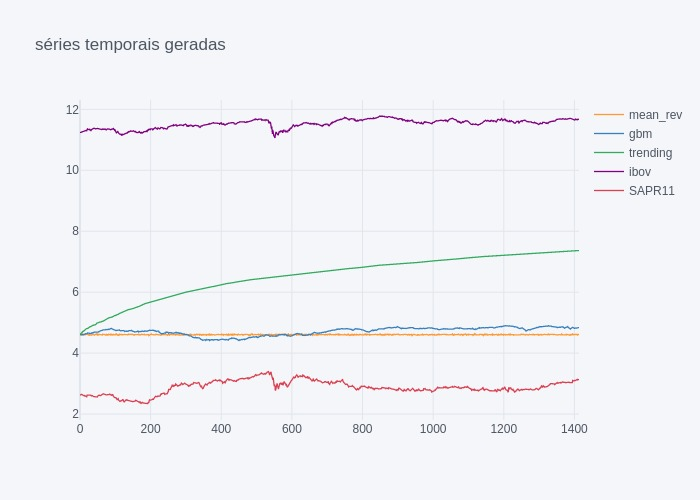

exponetes de Hurst com lag 20  ----
mean_rev: 0.0029
gbm: 0.4994
trending: 0.8157
ibov: 0.5560
SAPR11: 0.5043
----
exponetes de Hurst com lag 100  ----
mean_rev: -0.0009
gbm: 0.5215
trending: 0.8663
ibov: 0.4812
SAPR11: 0.4948
----
exponetes de Hurst com lag 300  ----
mean_rev: 0.0024
gbm: 0.5393
trending: 0.8306
ibov: 0.3318
SAPR11: 0.4802
----
exponetes de Hurst com lag 500  ----
mean_rev: 0.0030
gbm: 0.4903
trending: 0.7695
ibov: 0.2351
SAPR11: 0.4765
----


In [24]:
sample_size = len(preco)
scalar = 100

np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar),
                        "ibov" : np.log(ibov['Close'].values),
                        codigo: np.log(preco['Preço'].values)}
                  )
df.iplot(title="séries temporais geradas");

for lag in [20, 100, 300, 500]:
    print(f"exponetes de Hurst com lag {lag}  ----")
    for column in df.columns:
        print(f"{column}: {get_hurst_exponent(df[column].values, lag):.4f}")
    print('----')

In [25]:
# print(codigo)
# for lag in [20, 100, 300, 500]:
#     hurst_exp = get_hurst_exponent(np.log(preco['Preço'].values), lag)
#     print(f"{lag} lags: {hurst_exp:.4f}")

# print('ibov'.upper())
# for lag in [20, 100, 300, 500]:
#     hurst_exp = get_hurst_exponent(np.log(ibov['Close'].values), lag)
#     print(f"{lag} lags: {hurst_exp:.4f}")
# #shorter_series = preco['Preço'].loc["2022":"2023"].values
# #for lag in [20, 100, 250, 500]:
# #    hurst_exp = get_hurst_exponent(shorter_series, lag)
# #    print(f"{lag} lags: {hurst_exp:.4f}")


#### Reversão à média


Uma série temporal contínua com reversão à média pode ser representada por uma equação diferencial estocástica de Ornstein-Uhlenbeck: $dX_t = \theta(\mu-X_t)dt + \sigma dW_t$ onde $\theta$ é a taxa de reversão à média, $\mu$ é o valor  médio do processo, $\sigma$ é a variância do processo e $W_t$ é um Processo de Wiener (Movimento Browniano). Num cenário discreto a equação afirma que a mudança da série de preços no próximo período de tempo é proporcional à diferença entre o preço médio e o preço atual, com a adição de ruído gaussiano.

*Teste Dickey-Fuller Aumentado (ADF)*: testa a presença de uma *raiz unitária* em uma amostra de série temporal autorregressiva. Aproveita o fato de que se uma série de preços possuir reversão à média, então o próximo nível de preços será proporcional ao nível de preços atual. Um modelo linear de *lag* $p$ é usado para a série temporal: $\Delta y_t = =\alpha + \beta t + \gamma y_t + \sum_{i=1}^{p-1} \delta_i y_{t-i}$

Onde $\alpha$ é uma constante, $\beta$ representa o coeficiente de uma tendência temporal. O papel do teste de hipótese ADF é considerar a hipótese nula de que $\gamma=0$, o que indicaria (com $\alpha=\beta=0$) que o processo é um passeio aleatório e, portanto, não tem reversão média. Se a hipótese de que $\gamma=0$ pode ser rejeitada, então o movimento seguinte da série de preços é proporcional ao preço atual e, portanto, é improvável que seja um passeio aleatório. A estatística de teste é um número negativo e, portanto, para ser significativo além dos valores críticos, o número deve ser mais negativo que esses valores, ou seja, menor que os valores críticos.

Uma questão prática é que qualquer desvio constante de longo prazo num preço é de uma magnitude muito menor do que qualquer flutuação de curto prazo e, por isso, é frequentemente assumido  $\beta=0$. Além disso, geralmente, é  suficiente definir $p=1$ para nos permitir rejeitar a hipótese nula.

In [26]:
def check_estacionaridade(X, cutoff=0.01):
    '''
    H_0 é nao-estacionário, i.e., admite raiz unitaria (teste adfuller)
  Returns
    test statistic
    pvalue
    used lag
    n obs
    critical values dict at the 1 %, 5 %, and 10 % levels.
    '''

    from statsmodels.tsa.stattools import adfuller

    print(adfuller(X))

    pvalue = adfuller(X)[1]

    if pvalue < cutoff:
        print(f' \n p-value = {pvalue}. A serie {X.name} é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança {100*(1-pvalue)}.')
        return True
    else:
        mesg = 'não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.'
        print("\n".join(textwrap.wrap(mesg,118)))
        return False

In [27]:
check_estacionaridade(preco['Preço'])

(-2.1345415526356097, 0.2308539446035252, 17, 1396, {'1%': -3.435042954953382, '5%': -2.8636126027916173, '10%': -2.567873447118661}, 1327.2343414785428)
não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos
encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.


False

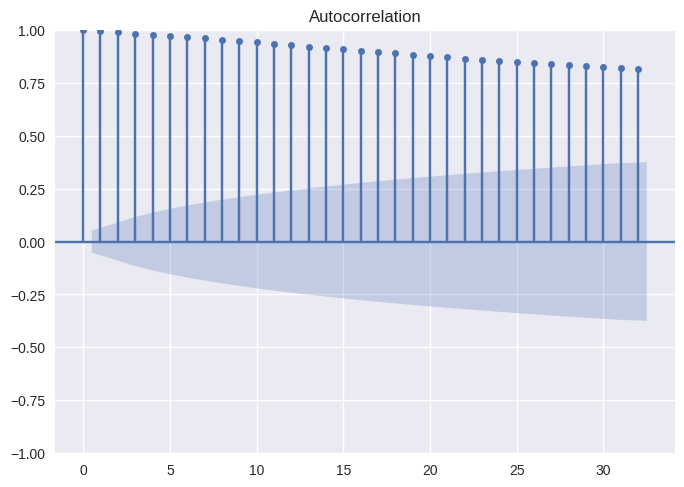

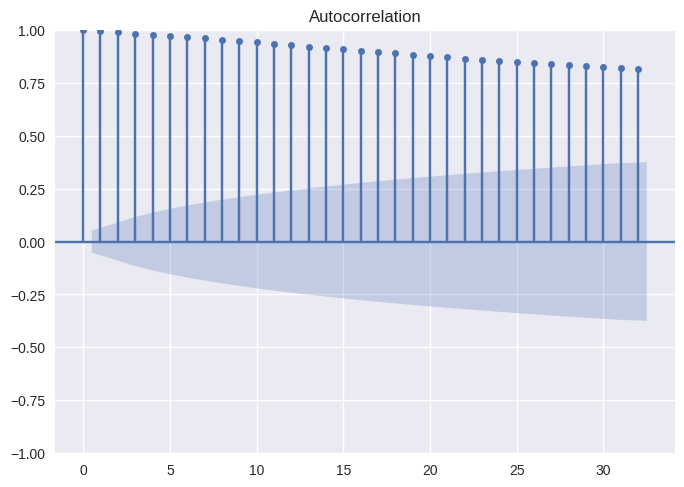

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(preco['Preço'])

(-13.571929552592552, 2.2064355380727313e-25, 6, 1406, {'1%': -3.4350095156582197, '5%': -2.863597846112653, '10%': -2.5678655888095925}, 1329.6409532662224)
 
 p-value = 2.2064355380727313e-25. A serie Delta de Preço é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança 100.0.


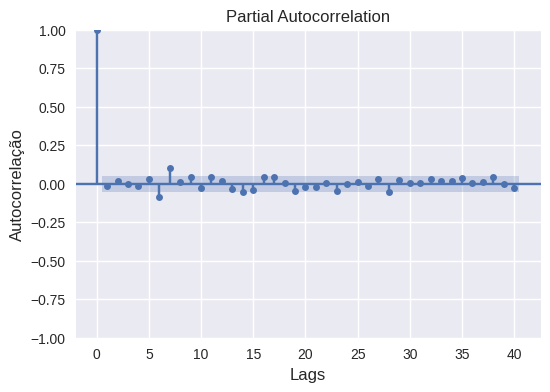

In [29]:
Delta_preco = preco['Preço'].diff()[1:]
Delta_preco.name =  'Delta de ' + preco['Preço'].name
if check_estacionaridade(Delta_preco) :
  plt.rcParams['figure.figsize'] = [6,4]
  plot_pacf(Delta_preco, lags=40)
  plt.xlabel('Lags', fontsize=12)
  plt.ylabel('Autocorrelação', fontsize=12)
  plt.plot();

#### cointegração

É difícil encontrar um ativo possua um comportamento de reversão à média, as ações comportam-se geralmente como GBM. A forma mais simples de estratégias  de reversão à média é a clássica "pair trading", que geralmente envolve um par de ações "long-short" neutro em relação ao mercado. A teoria diz que duas empresas do mesmo setor estarão provavelmente expostas a fatores de mercado semelhantes, que afetam os seus negócios. Ocasionalmente, os preços relativos das suas ações divergirão devido a determinados eventos, mas reverterão para a média de longo prazo.

In [30]:
from statsmodels.tsa.stattools import coint

def zscore(series):
    return (series - series.mean()) / np.std(series)


def find_cointegrated_pairs(data,cutoff=0.1):
  n = data.shape[1]
  score_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))
  keys = data.keys()
  pairs = []
  for i in range(n):
      for j in range(i+1, n):
          X = data[keys[i]]
          Y = data[keys[j]]
          result = coint(X, Y)
          score = result[0]
          pvalue = result[1]
          score_matrix[i, j] = score
          pvalue_matrix[i, j] = pvalue
          if pvalue < cutoff:
              pairs.append((keys[i], keys[j]))
  return score_matrix, pvalue_matrix, pairs

def residuos (x,y)  :
  # slope,intercept, r, pvalue, stderr = stats.linregress(y=y,x=x)
  from scipy import stats
  return y - stats.linregress(y=y,x=x)[0] * x

In [31]:
if usar_periodo :
  IBr50_preco = yf.download((pd.Series(IBr50)+'.SA').to_list(), period = periodo , progress = False)[qual_preco]
  IBr50_preco = IBr50_preco.loc[preco.index[0]:]
else :
  IBr50_preco = yf.download((pd.Series(IBr50)+'.SA').to_list(), start=inicio , end=termino , progress = False)[qual_preco]

In [32]:
if check_estacionaridade(preco['Preço'].diff()[1:]) :
  print(codigo+' cointegra com ')

  min_score=0.0
  cont=0

#### em 250 dias
  X = pd.Series(preco['Preço'][-250:])
  for T in IBr50 :
      if T == codigo : # pula e passa pra próxima
        continue
      Y = pd.Series(IBr50_preco[T+'.SA'][-250:].dropna())

      if Y.shape == X.shape :
        t,p,c = coint(X,Y)
        for pvalue in [0.01,0.05, 0.1] :
          if p < pvalue :
            cont+=1
            print(f'{T} no nivel de confiança {(1-pvalue)*100}%', end=" - ")
            if pvalue == 0.01 : vc=c[0]
            elif pvalue == 0.05 : vc=c[1]
            else : vc=c[2]
            print(f'score={t} para o valor crítico {vc}')

            if t < min_score :
              min_score=t
              Min_score=T
            break


(-13.571929552592552, 2.2064355380727313e-25, 6, 1406, {'1%': -3.4350095156582197, '5%': -2.863597846112653, '10%': -2.5678655888095925}, 1329.6409532662224)
 
 p-value = 2.2064355380727313e-25. A serie Preço é, provavelmente, estacionaria ou estacionaria com tendência com grau de confiança 100.0.
SAPR11 cointegra com 
SAPR4 no nivel de confiança 95.0% - score=-3.3974486391162135 para o valor crítico -3.360778600829019


In [33]:
check_estacionaridade(X)

(-0.012390791146920424, 0.9574953017712032, 2, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 139.49802851680568)
não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos
encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.


False

In [34]:
check_estacionaridade(Y)

(-2.574814759045246, 0.09831506164867287, 1, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 722.4877836839225)
não podemos rejeitar a hipótese nula de que existe uma raiz unitária, e, portanto, é improvável que tenhamos
encontrado uma série temporal com reversão à média, o que implica que a série de dados não é estacionária.


False

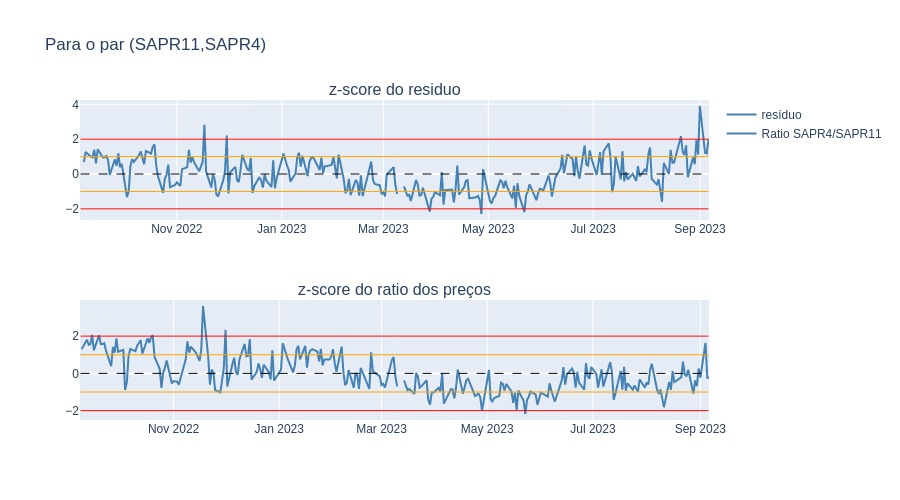

In [35]:
Y = IBr50_preco[Min_score+'.SA'][-250:]
slope,intercept, r, pvalue, stderr = stats.linregress(y=Y,x=X)
residuos =  Y - slope * X

trace1 = go.Scatter( x = residuos.index,  y = zscore(residuos) ,
                    name = 'resíduo',
                    line=dict(color='steelblue'))

trace2 = go.Scatter( x = Y.index,  y = zscore(Y/X) ,
                    name = 'Ratio '+Min_score+'/'+codigo,
                    line=dict(color='steelblue'))

fig = make_subplots(rows=2, cols=1,subplot_titles=(['z-score do residuo','z-score do ratio dos preços']))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(shapes=[{'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'black','width': 1,'dash':'dash'}},
                             {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'black','width': 1,'dash':'dash'}},
                             {'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'red','width': 1}}
                             ],title='Para o par ('+codigo+','+Min_score+')',
                     width=900,
                     height=500)
fig.show()

simula pair trading na par acima:

lookback-performance ...


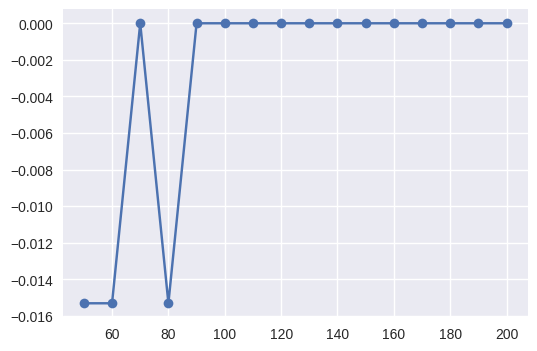

In [36]:
def create_pairs_dataframe(symbols) :
  pairs = pd.DataFrame(index=X.index)
  pairs[f'{codigo}_close'] = X
  pairs[f'{Min_score}_close'] = Y
  pairs.index = pd.to_datetime(pairs.index)
  return pairs.dropna()

def calculate_spread_zscore(pairs, symbols, lookback=100) :

  from statsmodels.regression.rolling import RollingOLS

  model = RollingOLS(
        endog=pairs['%s_close' % symbols[0]],
        exog=sm.add_constant(pairs['%s_close' % symbols[1]]),
        window=lookback
    )
  rres = model.fit()
  params = rres.params.copy()
  pairs['hedge_ratio'] = params[codigo+'_close']
  pairs.dropna(inplace=True)

  # spread e z-score do spread
  pairs['spread'] = (pairs[Min_score+'_close'] - pairs['hedge_ratio']*pairs[codigo+'_close'] )
  pairs['zscore'] = zscore(pairs['spread'])
  #pairs['spread'] - np.mean(pairs['spread']))/np.std(pairs['spread'])

  return pairs

def create_long_short_market_signals(pairs, symbols, z_entry_threshold=2.0, z_exit_threshold=1.0):

  pairs['longs']  = (pairs['zscore'] <= -z_entry_threshold)*1.0
  pairs['shorts'] = (pairs['zscore'] >= z_entry_threshold)*1.0
  pairs['exits']  = (np.abs(pairs['zscore']) <= z_exit_threshold)*1.0

  # precisamos propagar uma posição para frente, ou seja,
  # precisamos permanecer comprados se escore Z for menor que o limite de entrada de Z,
  # mas ainda maior que o limite de saída, e vice-versa para as vendas a descoberto.
  pairs['long_market'] = 0.0
  pairs['short_market'] = 0.0

  #controle de se devemos estar comprados ou vendidos enquanto iteramos pelos dados de barras.
  long_market = 0
  short_market = 0

  # Calcula quando estar efetivamente comprado ou vendido, bem como quando não estar.
  for i, b in enumerate(pairs.iterrows()):
    # Calculate longs
    if b[1]['longs'] == 1.0:
        long_market = 1
    # Calculate shorts
    if b[1]['shorts'] == 1.0:
        short_market = 1
    # Calculate exists
    if b[1]['exits'] == 1.0:
        long_market = 0
        short_market = 0

    pairs.iloc[i]['long_market'] = long_market
    pairs.iloc[i]['short_market'] = short_market

  return pairs

def create_portfolio_returns(pairs, symbols):

    sym1 = symbols[0]
    sym2 = symbols[1]

    # fluxo de retornos percentuais;
    # elimina todas as células NaN e -inf/+inf
    portfolio = pd.DataFrame(index=pairs.index)
    portfolio['positions'] = pairs['long_market'] - pairs['short_market']
    portfolio[sym1] = -1.0 * pairs['%s_close' % sym1] * portfolio['positions']
    portfolio[sym2] = pairs['%s_close' % sym2] * portfolio['positions']
    portfolio['total'] = portfolio[sym1] + portfolio[sym2]

    portfolio['returns'] = portfolio['total'].pct_change()
    portfolio['returns'].fillna(0.0, inplace=True)
    portfolio['returns'].replace([np.inf, -np.inf], 0.0, inplace=True)
    portfolio['returns'].replace(-1.0, 0.0, inplace=True)
    return portfolio

symbols = (Min_score, codigo)

lookbacks = range(50, 210, 10)
returns = []

for lb in lookbacks:
    pairs = create_pairs_dataframe(symbols)
    pairs = calculate_spread_zscore(pairs, symbols, lookback=lb)
    pairs = create_long_short_market_signals(pairs, symbols, z_entry_threshold=2.0, z_exit_threshold= 0.10)
    portfolio = create_portfolio_returns(pairs, symbols)
    returns.append(portfolio.iloc[-1]['returns'])

print("lookback-performance ...")
plt.plot(lookbacks, returns, '-o')
plt.show()

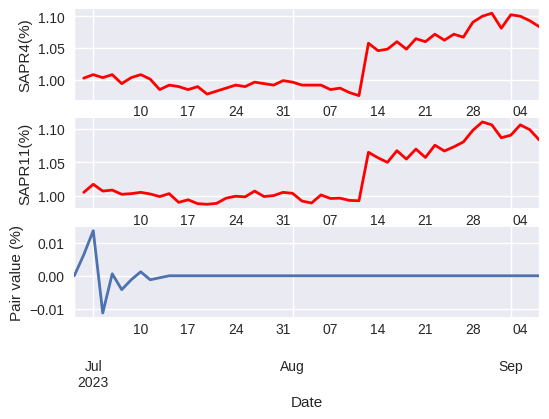

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(311,  ylabel= f'{symbols[0]}(%)')
(pairs[f'{symbols[0]}_close'].pct_change()+1.0).cumprod().plot(ax=ax1, color='r', lw=2.)

ax2 = fig.add_subplot(312,  ylabel= f'{symbols[1]}(%)')
(pairs[f'{symbols[1]}_close'].pct_change()+1.0).cumprod().plot(ax=ax2, color='r', lw=2.)

ax3 = fig.add_subplot(313, ylabel='Pair value (%)')
portfolio['returns'].plot(ax=ax3, lw=2.)
plt.show()

##Drawdown máximo no período


In [38]:
def get_max_drawdown(price):
  data = pd.DataFrame(price)
  column = price.name
  data['max'] = data[column].cummax()
  data['delta'] = data['max'] - data[column]
  data['dd'] = 100 * (data['delta'] / data['max'])
  maxdrawdown = data['dd'].max()
  bottom_day = data['dd'].idxmax()
  bottom_index = data[['dd']].index.get_loc(bottom_day)
  max_value = data.iloc[bottom_index]['max']
  top_day = (data['max'] == max_value).idxmax()
  top_index = data[['max']].index.get_loc(top_day)
  return maxdrawdown, bottom_day, bottom_index, top_day, top_index

In [39]:
dd, bday, bindex, tday, tindex = get_max_drawdown(preco['Preço'])
print('max drawdown ', round(dd,2),'% de ', tday.strftime('%d/%m/%Y') , ' até ' , bday.strftime('%d/%m/%Y') )

max drawdown  49.56 % de  20/02/2020  até  14/12/2022


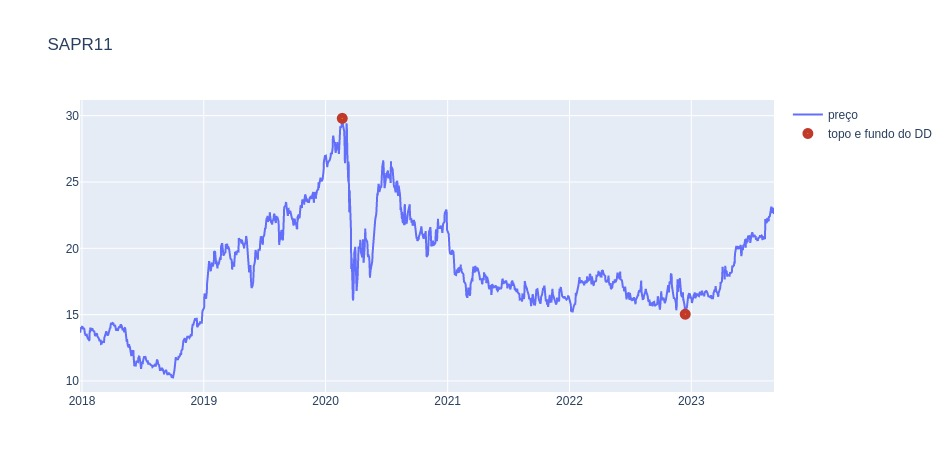

In [40]:
trace1 = go.Scatter(x = preco.index, y = preco['Preço'], mode = 'lines' , name = 'preço' )
trace2 = go.Scatter(x = [preco.index[bindex],preco.index[tindex]],
                    y = [preco['Preço'].iloc[bindex] , preco['Preço'].iloc[tindex]],
                   mode = 'markers', name = 'topo e fundo do DD',
                   marker =  {'color' : 'orange',
                              'line' : {'width': 5,
                                        'color': '#c0392b'}} )
layout =  dict( title = codigo, height = 472, width = 950, #  font = dict(  size = 10  ),
               )

data_trace = [trace1,trace2]

fig=go.Figure(data=data_trace , layout=layout)
fig.show()

In [41]:
#@title #### Drawdowns por ano
years = [*range(datetime.strptime(inicio, "%Y-%m-%d").year , datetime.strptime(termino, "%Y-%m-%d").year + 1)]
DDM = pd.DataFrame(columns=[codigo , 'Ibov'],index=years)#, codigo , 'Ibov'])

In [42]:
i=0
yearly_data=pd.DataFrame()
for year in years :
  yearly_data = preco[preco.index.year == year].copy()

  if len(yearly_data.index)>0 :
      yearly_dd1,_,_,_,_ = get_max_drawdown(yearly_data['Preço'])
      yearly_dd2,_,_,_,_ = get_max_drawdown(yearly_data['ibov'])
      DDM.loc[year] = [round(yearly_dd1,2), round(yearly_dd2,2)]
  i=i+1

Drawdowns máximos por ano:


,SAPR11,Ibov
2007,NaN,NaN
2008,NaN,NaN
2009,NaN,NaN
2010,NaN,NaN
2011,NaN,NaN
2012,NaN,NaN
2013,NaN,NaN
2014,NaN,NaN
2015,NaN,NaN
2016,NaN,NaN


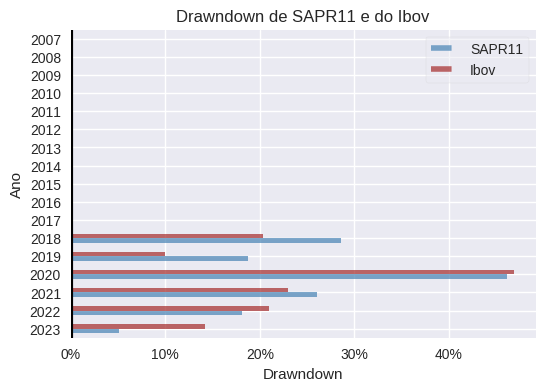

In [43]:
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    return '%.0f%%' % x

ax = plt.gca()

x_axis_formatter = FuncFormatter(percentage)
ax.xaxis.set_major_formatter(FuncFormatter(x_axis_formatter))
ax.tick_params(axis='x', which='major')

ax.axvline(DDM[codigo].values.mean(),color='steelblue',linestyle='--',lw=4,alpha=0.7);
ax.axvline(DDM['Ibov'].values.mean(), color='brown',  linestyle='--',lw=4,alpha=0.7);
(DDM.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= ['steelblue','brown']);
ax.axvline(0.0, color='black', linestyle='-', lw=3);

ax.set_ylabel('Ano');
ax.set_xlabel('Drawndown');
ax.set_title("Drawndown de "+codigo+" e do Ibov");
ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

print('Drawdowns máximos por ano:')

DDM

# Retornos


In [44]:
preco['retorno'] = preco['Preço'].pct_change()
preco['log_retorno'] = np.log(preco['Preço']) - np.log(preco['Preço'].shift(1))
ibov['Preço'] = ibov[qual_preco]
ibov['retorno'] = ibov['Preço'].pct_change()
ibov['log_retorno'] = np.log(ibov['Preço']) - np.log(ibov['Preço'].shift(1))

In [45]:
retornos = pd.merge(ibov['retorno'], preco['retorno'],
                    left_index=True, right_index=True, how='inner')
retornos = retornos.rename(columns={ibov['retorno'].name+'_x':'r_ibov' , preco['retorno'].name+'_y':'r_'+codigo})
retornos['lr_ibov'] = ibov['log_retorno']
retornos['lr_'+codigo] = preco['log_retorno']
retornos.dropna(inplace=True)

print(retornos.shape)
retornos.head(2)

(1412, 4)


,r_ibov,r_SAPR11,lr_ibov,lr_SAPR11
Date,,,,
2017-12-27,0.005087,0.000341,0.005074,0.000341
2017-12-28,0.004325,0.019227,0.004315,0.019045


In [46]:
##semanal
weekly_returns = pd.DataFrame()
weekly_returns[codigo] = preco['Preço'].resample('W').ffill()
weekly_returns['retorno'] =  weekly_returns[codigo].pct_change()
weekly_returns.dropna(inplace=True)

##mensal
monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill()
monthly_returns['retorno'] = monthly_returns[codigo].pct_change()
monthly_returns.dropna(inplace=True)

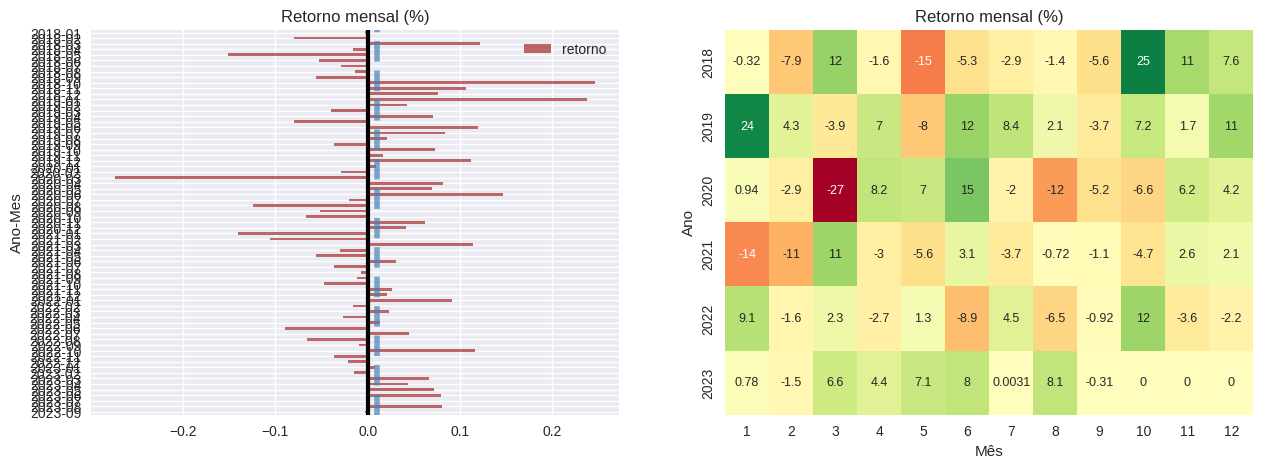

In [47]:
fig = plt.figure(1)
plt.subplot(1,2,1)
ax = plt.gca()

mr = pd.DataFrame(data=monthly_returns['retorno'])
mr.index = mr.index.to_period(freq='M')

ax.axvline(mr.values.mean(), color='steelblue',  linestyle='--',lw=4,alpha=0.7);
(mr.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= 'brown');
ax.axvline(0.0, color='black', linestyle='-', lw=3);
ax.set_ylabel('Ano-Mes')
ax.set_title("Retorno mensal (%)")

#ax.set_ylabel('Ano');
#ax.set_xlabel('Drawndown');
#ax.set_title("Drawndown de "+codigo+" e do Ibov");
#ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

plt.subplot(1,2,2)
ax = plt.gca()

returns_table = monthly_returns.pivot_table(values='retorno',
                               index=monthly_returns.index.year,
                               columns=monthly_returns.index.month,
                               aggfunc='mean')

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax)
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(15,5)
plt.show()

### normalidade na distribuição dos retornos

In [48]:
r_media = retornos['lr_'+codigo].mean()
r_variancia = retornos['lr_'+codigo].var()
r_desviopadrao = retornos['lr_'+codigo].std()

jb_test = stats.jarque_bera(retornos['lr_'+codigo].values)
print(f'teste Jarque-Bera: {jb_test[0]:.2f} com p-valor: {jb_test[1]:.2f}')
r_range = np.linspace(min(retornos['lr_'+codigo]), max(retornos['lr_'+codigo]), num=1000)
norm_pdf = stats.norm.pdf(r_range, loc=r_media , scale=r_desviopadrao)

teste Jarque-Bera: 5132.37 com p-valor: 0.00


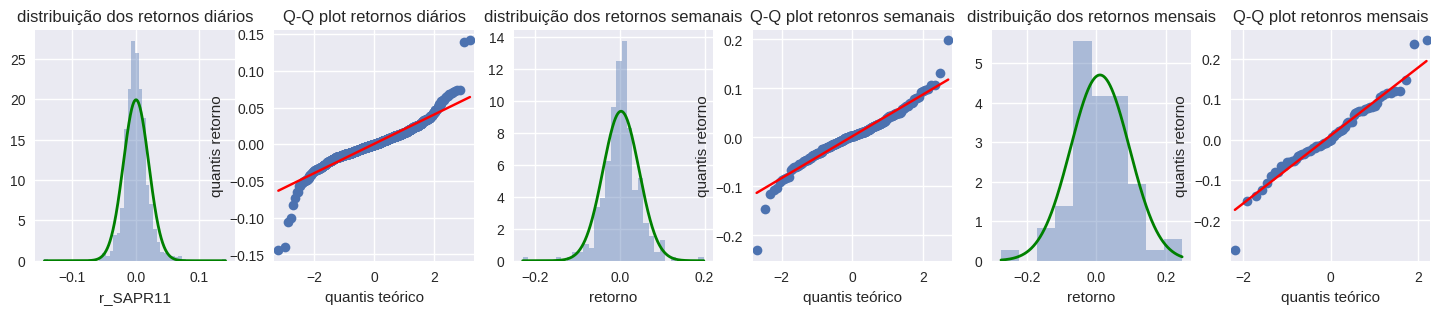

In [49]:
r_fig, ax = plt.subplots(1, 6 , figsize=(18,3))

r_range = np.linspace(min( retornos['r_'+codigo]), max( retornos['r_'+codigo]), num=1000)
# histograma diário
sns.distplot( retornos['r_'+codigo], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('distribuição dos retornos diários')#, fontsize=12)
ax[0].plot(r_range, stats.norm.pdf(r_range, loc=r_media, scale=r_desviopadrao) ,#
           'g', lw=2,label=f'N({r_media:.2f}, {r_variancia:.4f})')
# Q-Q plot diário
qq1 = sm.qqplot( retornos['r_'+codigo].values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot retornos diários')#, fontsize = 12)
ax[1].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

##semanal
r_range = np.linspace(min(weekly_returns['retorno']), max(weekly_returns['retorno']), num=1000)
w_m = weekly_returns['retorno'].mean()
w_s = weekly_returns['retorno'].std()

# histograma semanal
sns.distplot(weekly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[2])
ax[2].set_title('distribuição dos retornos semanais')#, fontsize=12)
ax[2].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot semanal
qq2 = sm.qqplot(weekly_returns['retorno'].values, line='s', ax=ax[3])
ax[3].set_title('Q-Q plot retonros semanais')#, fontsize = 12)
ax[3].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')


##mensal
r_range = np.linspace(min(monthly_returns['retorno']), max(monthly_returns['retorno']), num=1000)
w_m = monthly_returns['retorno'].mean()
w_s = monthly_returns['retorno'].std()

# histograma mensal
sns.distplot(monthly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[4])
ax[4].set_title('distribuição dos retornos mensais')#, fontsize=12)
ax[4].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot mensal
qq2 = sm.qqplot(monthly_returns['retorno'].values, line='s', ax=ax[5])
ax[5].set_title('Q-Q plot retonros mensais')#, fontsize = 12)
ax[5].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

fig.tight_layout()
fig.show()

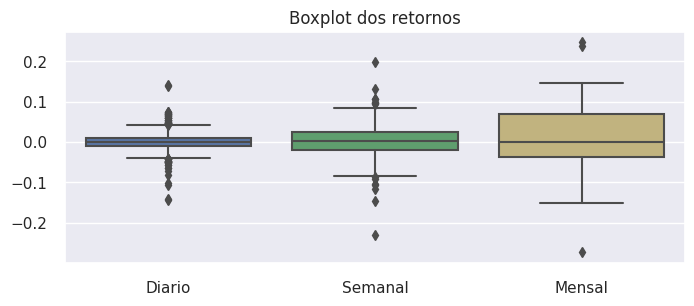

In [50]:
sns.set(rc={'figure.figsize':(8,3)})
sns.axes_style(style='darkgrid' )
ax = plt.gca()
ax.set_title('Boxplot dos retornos')
sns.boxplot(data=[retornos['r_'+codigo], weekly_returns['retorno'], monthly_returns['retorno']],
                palette=["#4c72B0", "#55A868", "#CCB974"], ax=ax)
ax.set_xticklabels(['Diario', 'Semanal', 'Mensal']);

comparação com ibov

In [51]:
print('-- Estatísticas do retorno diário')
tmp = [['Intervalo de datas' , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date)) , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date))],
       ['no. de observações' , retornos['r_'+codigo].shape[0] , retornos['r_ibov'].shape[0]],
       ['min', str(round( retornos['r_'+codigo].min()*100,3))+'%', str(round( retornos['r_ibov'].min()*100,3))+'%'],
       ['max', str(round( retornos['r_'+codigo].max()*100,3))+'%', str(round( retornos['r_ibov'].max()*100,3))+'%'],
       ['média', str(round( retornos['r_'+codigo].mean()*100,3))+'%', str(round( retornos['r_ibov'].mean()*100,3))+'%'],
       ['mediana', str(round( retornos['r_'+codigo].median()*100,3))+'%', str(round( retornos['r_ibov'].median()*100,3))+'%'],
       ['desvio padrão', str(round( retornos['r_'+codigo].std()*100,3))+'%', str(round( retornos['r_ibov'].std()*100,3))+'%'],
       ['assimetria', round( retornos['r_'+codigo].skew(),3), round( retornos['r_ibov'].skew(),3)],
       ['curtose', round( retornos['r_'+codigo].kurtosis(),3), round( retornos['r_ibov'].kurtosis(),3)],
       ['retorno anualizado',str(round( retornos['r_'+codigo].mean()*252*100,2))+'%' , str(round( retornos['r_ibov'].mean()*252*100,2))+'%'],
       ['dp anualizado',str(round( retornos['r_'+codigo].std()*np.sqrt(252)*100,2))+'%' , str(round( retornos['r_ibov'].std()*np.sqrt(252)*100,2))+'%'],
      ]
vol = pd.DataFrame(tmp , columns=['tmp' , 'r_'+codigo , 'r_ibov'], index=[i[0] for i in tmp])
vol.drop('tmp',axis=1, inplace=True)
data_table.DataTable(vol , include_index=True ,num_rows_per_page=15)

-- Estatísticas do retorno diário


,r_SAPR11,r_ibov
Intervalo de datas,2017-12-27 ~ 2023-09-06,2017-12-27 ~ 2023-09-06
no. de observações,1412,1412
min,-14.427%,-14.78%
max,14.168%,13.908%
média,0.055%,0.045%
mediana,-0.05%,0.054%
desvio padrão,1.999%,1.65%
assimetria,0.023,-0.891
curtose,8.74,16.062
retorno anualizado,13.96%,11.34%


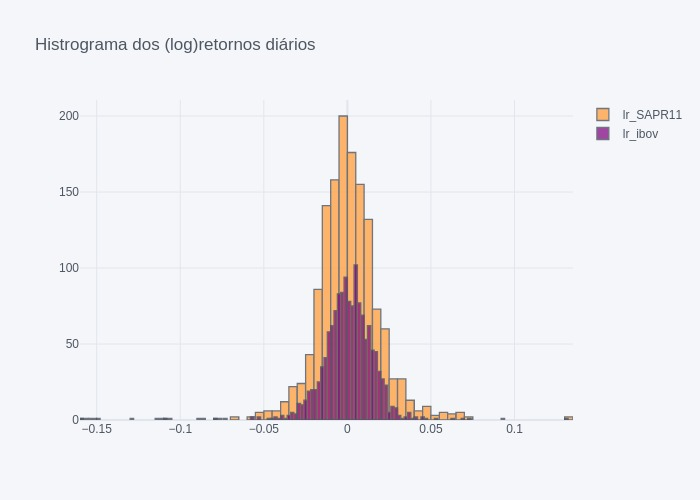

In [52]:
#@markdown histogramas dos (log)retornos diários

retornos.iplot(kind='histogram',
                  #subplots=True,
                  keys = ['lr_'+codigo,'lr_ibov'],
                  colors=['orange','purple'],
                  title='Histrograma dos (log)retornos diários',
                  #theme="henanigans"
                  )

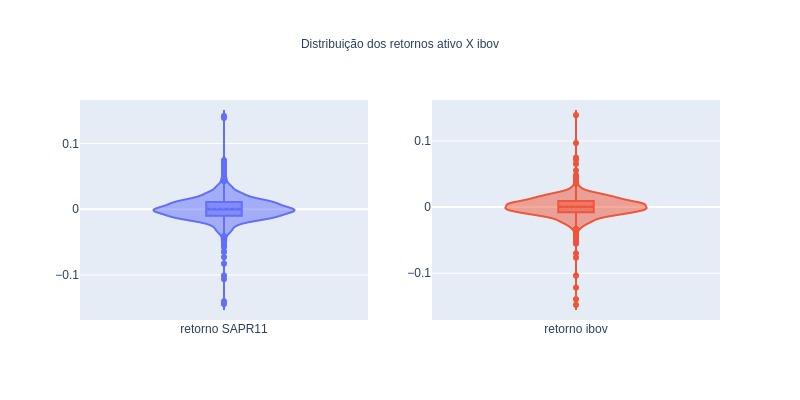

In [53]:
title = "Distribuição dos retornos ativo X ibov"

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_'+codigo].values, name='retorno '+codigo)
    ,row=1, col=1)
fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_ibov'], name='retorno ibov')
    ,row=1, col=2)
fig.update_layout(title_font_size=12 , width=800 , height=400 , showlegend=False,
               title={'text': title,'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},   )

fig.show()

In [54]:
stats.norm.interval(alpha=0.98,
              loc= retornos['r_ibov'].mean(),
              scale=stats.sem(retornos['r_ibov']))

(-0.0005718553483079183, 0.0014717498922655902)

In [55]:
ipca = quandl.get('BCB/13522', start_date = min(retornos.index.date))
ipca.rename(columns={'Value': 'ipca'}, inplace=True)
cdi=quandl.get('BCB/12', start_date = min(retornos.index.date))
cdi.rename(columns={'Value': 'cdi'}, inplace=True)

In [56]:
#cdi.index=cdi.index.tz_localize(tz='America/Sao_Paulo')
#ipca.index=ipca.index.tz_localize(tz='America/Sao_Paulo')

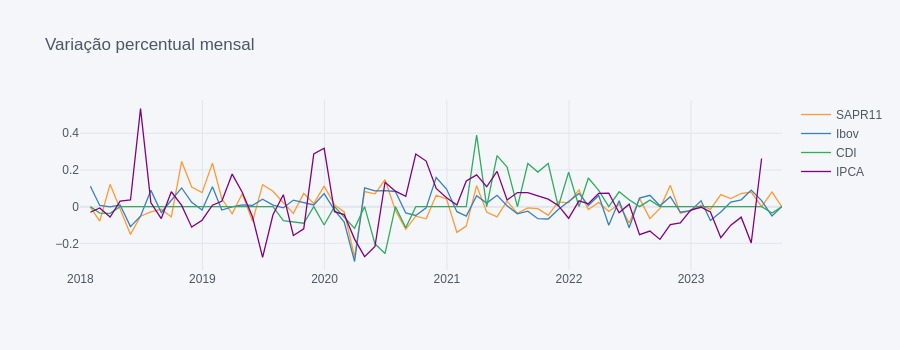

In [57]:
# @ markdown gráficos dos retornos mensais

monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill().pct_change()
monthly_returns['Ibov'] = ibov['Preço'].resample('M').ffill().pct_change()
monthly_returns['CDI']  = cdi['cdi'].resample('M').ffill().pct_change()
monthly_returns['IPCA'] = ipca['ipca'].pct_change()

trace2 = (monthly_returns).iplot(title= 'Variação percentual mensal',dimensions=(900,350))

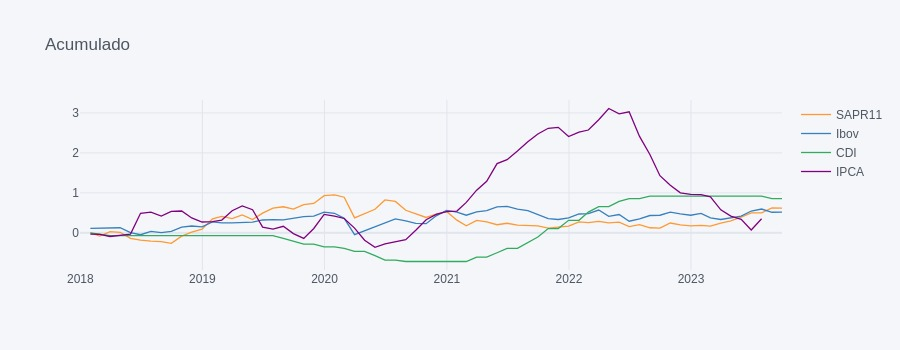

In [58]:
cum_returns = (monthly_returns + 1).cumprod() - 1
trace3 = cum_returns.iplot(title= 'Acumulado',dimensions=(900,350))

###Underwater

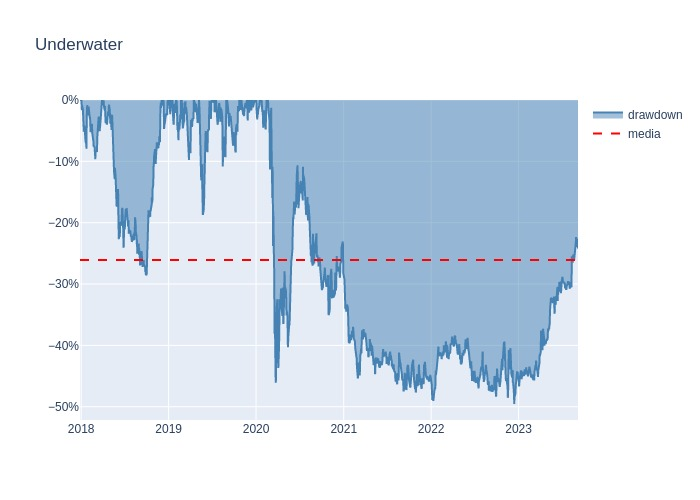

In [59]:
df_cum_rets = (retornos['r_'+codigo]+1).cumprod()
running_max = np.maximum.accumulate(df_cum_rets)
underwater = (df_cum_rets-running_max) / running_max
trace1 = go.Scatter(x=underwater.index,y=underwater, name = 'drawdown',line=dict(color='steelblue'), fill='tozeroy')

df_cum_rets_mean = -underwater.mean()
trace2 = go.Scatter(x=[min(underwater.index),max(underwater.index)],y=[-df_cum_rets_mean,-df_cum_rets_mean],
                    mode='lines',name = 'media',line=dict(color='red', width=2, dash='dash'))

layout = go.Layout(title='Underwater',showlegend=True)
fig = go.Figure(data=[trace1,trace2], layout=layout)
fig.layout.yaxis.tickformat = '.0%'

fig.show()

### correlação dos retornos com ativos do índice amplo

In [60]:
IBr50_rtrns = pd.DataFrame()
if codigo in IBr50 : IBr50_rtrns = IBr50_preco.pct_change()
else :
  IBr50_rtrns = (IBr50_preco.pct_change()).join(retornos['r_'+codigo],how='inner')
  IBr50_rtrns.rename(columns={'r_'+codigo : codigo+'.SA'}, inplace=True)
IBr50_rtrns.dropna(inplace=True)
#m=IBr50_rtrns.corr()

In [61]:
data_corr = pd.DataFrame(IBr50_rtrns.corr().loc[codigo+'.SA'])

(no colab) clique na figura


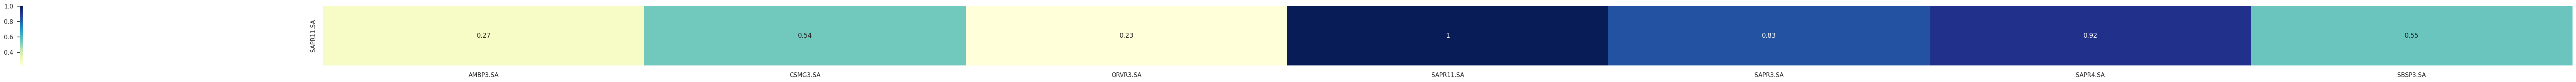

In [62]:
sns.set(rc = {'figure.figsize':(100,2)})
sns.heatmap(data_corr.T, annot = True, cmap = 'YlGnBu' , cbar_kws = dict(use_gridspec = False, location = "left"))
print('(no colab) clique na figura')

In [63]:
if usar_periodo :
  I50 = yf.download((pd.Series(IBr50)+'.SA').to_list(), period = periodo , actions=True , progress = False)
else :
  I50 = yf.download((pd.Series(IBr50)+'.SA').to_list(), start=inicio , end=termino , actions=True ,  progress = False)


In [64]:
I50_rtrns = (I50['Adj Close']).pct_change().dropna()

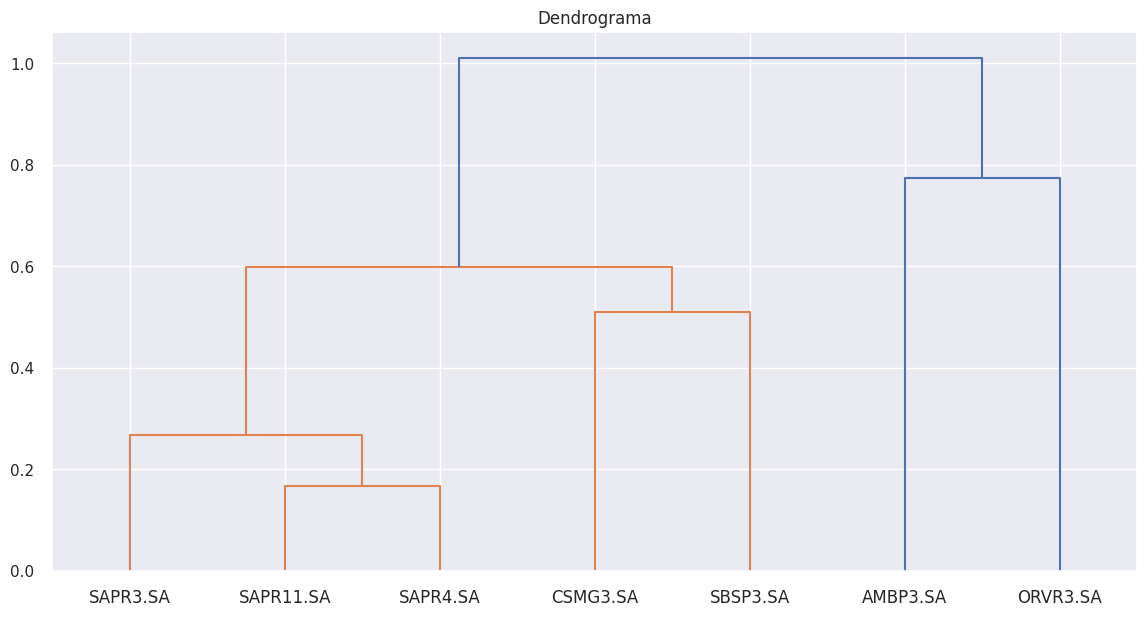

In [65]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14, 7))
plt.title("Dendrograma")

clusters = shc.linkage(I50_rtrns.T, method='ward', metric='euclidean')

dendograma = shc.dendrogram(clusters, labels=I50_rtrns.columns)


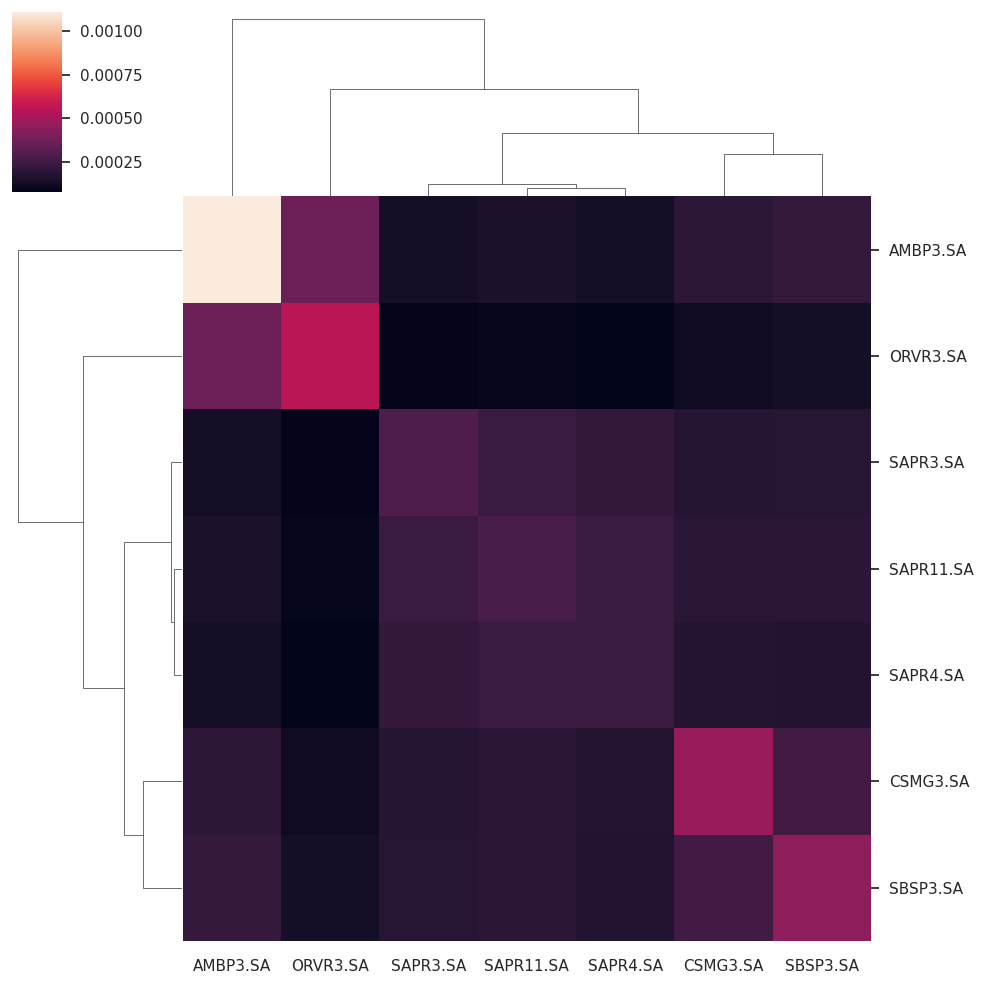

In [66]:
matriz_covarianca = I50_rtrns.cov()
dendograma = sns.clustermap(matriz_covarianca, method='ward', metric='euclidean')
colunas_seriation = dendograma.dendrogram_col.reordered_ind
colunas_seriation = I50_rtrns.columns[colunas_seriation]


### retorno esperado pelo CAPM



In [67]:
## o join garante a coincidencia da datas
capm_data = ((cdi.join(retornos['r_'+codigo])).join(retornos['r_ibov'])).dropna()
capm_data.head(2)

,cdi,r_SAPR11,r_ibov
Date,,,
2017-12-27,0.026444,0.000341,0.005087
2017-12-28,0.026444,0.019227,0.004325


In [68]:
X = capm_data['r_ibov'] - capm_data['cdi']     # excesso retorno ativo
y = capm_data['r_'+codigo] - capm_data['cdi']  # excesso retorno indice
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
_, beta = result.params

expected_return = capm_data['cdi'].mean() + beta*X.mean()
print("Retorno diário esperado: " + str(expected_return))
monthly_return = expected_return * 21
print("Retorno mensal esperado: " + str(monthly_return))
yearly_return = monthly_return * 12
print("Retorno anual esperado : " + str(yearly_return))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1597.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          4.49e-234
Time:                        00:42:29   Log-Likelihood:                 3759.6
No. Observations:                1411   AIC:                            -7515.
Df Residuals:                    1409   BIC:                            -7505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.001     -7.383      0.0

### hedge

A correlação entre os retornos é 0.56


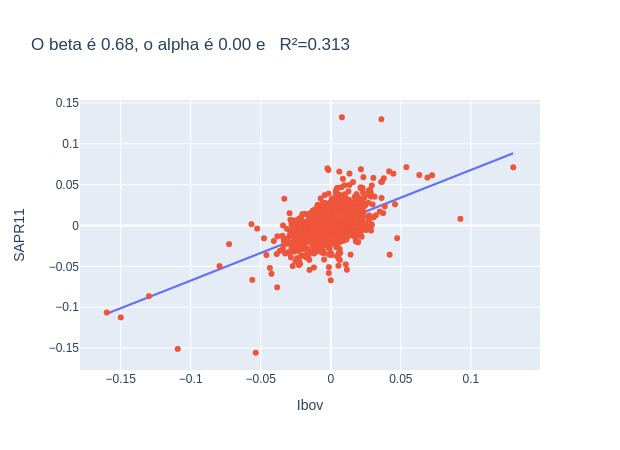

In [69]:
slope,intercept, r, pvalue, stderr = stats.linregress(x=retornos['r_ibov'], y=retornos['r_'+codigo])

print(f'A correlação entre os retornos é {r:.2f}')

line_x = np.linspace(retornos['lr_ibov'].min(), retornos['lr_ibov'].max(),100)
line_y = slope*line_x + intercept

trace1 = go.Scatter(x = line_x,y = line_y, mode = 'lines' )

trace2 = go.Scatter(x = retornos['lr_ibov'], y=retornos['lr_'+codigo] , mode ='markers')

layout = dict(title = f'O beta é {slope:.2f}, o alpha é {intercept:.2f} e   R²={r**2:.3f}',
              xaxis_title="Ibov",
              yaxis_title=codigo,
              height = 450,width = 620,
              showlegend=False,
              font = dict(size = 12),    )

data_trace = [trace1,trace2]

fig = go.Figure(data=data_trace , layout=layout)

fig.show()

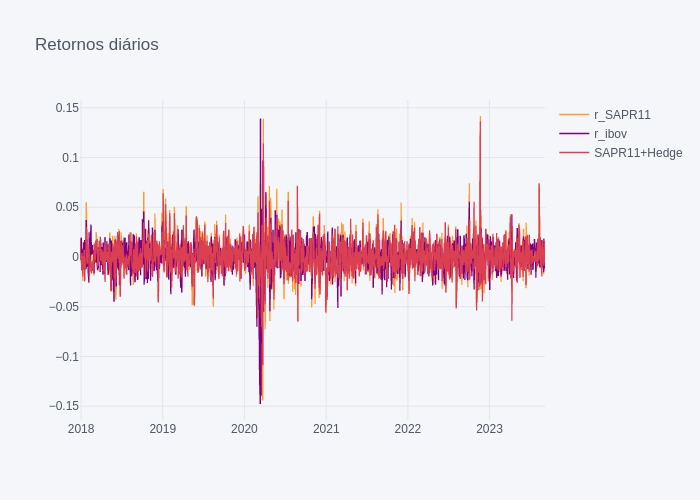

In [70]:
# beta hedge
"""
Os gerentes de carteiras projetam modelos de fatores que lhes dizem como equilIBr50r um portfólio para obter alfa.
Como alfa é como os gerentes são pagos, eles só querem exposição a seus fatores.
A cobertura beta remove a parte dos retornos impulsionados pelo mercado e deixa apenas os retornos impulsionados pelos fatores.
"""


retornos[codigo+"+Hedge"] = -1 * slope * retornos['r_ibov']+ retornos['r_'+codigo]
retornos.iplot(   keys = ['r_'+codigo,'r_ibov',codigo+"+Hedge"],
                  colors=['orange','purple', 'red'],
                  title='Retornos diários' )


In [71]:
P = retornos[codigo+"+Hedge"].values
X = retornos['r_ibov'].values
alpha,beta,_,_,_ = stats.linregress(X, P)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: -3.4751580633978424e-16
Beta: 0.00024938522642884445


#Volatilidade

##Volatilidade Condicional

Garch(1,1): a variância condicional é $\sigma_n^2 = \omega + \alpha r_{n-1}^2 + \beta\sigma_{n-1}^2 $, as letras gregas são parâmetros estimados (por máx. verossimilhamça) do modelo, $r$ é retorno e $\sigma^2$ variância.  Os parâmetros:  $\omega = (1-\alpha-\beta)\cdot(\text{var de longo prazo})$, que é uma "reversão a média": $\sigma_{\infty}^2\to \text{VLP}$ com velocidade $1-\alpha-\beta$; $\alpha$ é o peso dos retornos  mais recentes, desde que $\alpha,\beta,\omega\geq 0$ e $\alpha+\beta<1$; $\beta$ é velocidade do  decaimento para as volatilidades mais recentes.

Quando $\omega=0,\alpha=1-\lambda, \beta=\lambda$ é o ewma: $ (1-\lambda) r_{n-1}^2 + \lambda \sigma_{n-1}^2$


In [72]:
#@title ####   EWMA
#@markdown fator de decaimento para ewma:
Lambda=0.94 #@param {type:"number"}


In [73]:
ewma = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
ewma['vol'].iloc[0] = np.sqrt((retornos['r_'+codigo][0:4]**2).sum())
for t in range(1,len(retornos['r_'+codigo])):
    ewma.iloc[t] = np.sqrt((1-Lambda)*retornos['r_'+codigo].iloc[t-1]**2 + Lambda*ewma.iloc[t-1]**2)
ewma.tail(3)

,vol
Date,
2023-09-04,0.015147
2023-09-05,0.015085
2023-09-06,0.014712


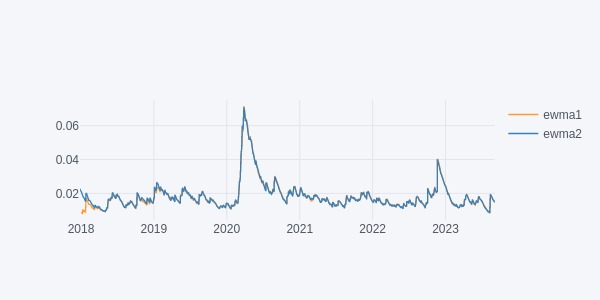

In [74]:
#########
tmp=pd.DataFrame()
tmp['ewma1'] = (retornos['r_'+codigo].ewm(alpha = 0.06, min_periods=4, adjust=False).std()).shift(1)
tmp['ewma2'] = ewma['vol']
tmp.iplot(dimensions=(600,300))
##########

In [75]:
#@title ####   GARCH(1,1)

!pip install -q arch
import scipy.optimize as spop

def garch_mle(params):
    mu    = params[0]
    omega = params[1]
    alpha = params[2]
    beta  = params[3]
    #variancia de longo prazo
    long_var =  (omega/(1 - alpha - beta))
    #volatilidade de longo prazo
    long_run = np.sqrt(long_var*252)
    #volatilidade condicional
    resid = retornos['r_'+codigo] - mu
    realised = abs(resid)
    conditional = np.zeros(len(retornos['r_'+codigo]))
    conditional[0] =  long_run
    # GARCH
    for t in range(1,len(retornos['r_'+codigo])):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    # np.log-verossimilhança
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    np.log_likelihood = np.sum(np.log(likelihood))
    return -np.log_likelihood
### grach parametros
# maximização  np.log-verossimilhança
res = spop.minimize(garch_mle , [r_media, r_variancia, 0, 0  ], method='Nelder-Mead')

params = res.x
G_mu     = res.x[0]
G_omega  = res.x[1]
G_alpha  = res.x[2]
G_beta   = res.x[3]
np.log_likelihood = -float(res.fun)
#print('np.log-verossim. '+str(round(np.log_likelihood, 4)))
###############################

print('Parâmetros do GARCH encontrados:')
print('mu '+str(round(G_mu, 6)))
print('omega '+str(round(G_omega, 6)))
print('alpha '+str(round(G_alpha, 6)))
print('beta  '+str(round(G_beta, 6)))


Parâmetros do GARCH encontrados:
mu 0.000997
omega 6e-05
alpha 0.17008
beta  0.654345


In [76]:
long_run = (G_omega/(1 - G_alpha - G_beta))**(1/2)
G_resid = retornos['r_'+codigo] - G_mu

conditional = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
conditional['vol'].iloc[0] = long_run
for t in range(1,len(retornos['r_'+codigo])):
    conditional['vol'].iloc[t] = (G_omega + G_alpha*G_resid.iloc[t-1]**2 + G_beta*conditional.iloc[t-1]**2)**(1/2)
conditional.tail(3)

,vol
Date,
2023-09-04,0.015287
2023-09-05,0.015572
2023-09-06,0.015123


In [77]:
print('VOLATILIDADE:')
print('volatilidade diária de longo prazo '+str(round(long_run, 6)*100)+'%')
print('volatilidade de longo prazo anualizada '+str(round(long_run*np.sqrt(252), 6)*100)+'%')
print(' ')

VOLATILIDADE:
volatilidade diária de longo prazo 1.8558000000000001%
volatilidade de longo prazo anualizada 29.459999999999997%
 


In [78]:
from arch import arch_model
model = arch_model(retornos['lr_'+codigo], mean='constant',vol='GARCH', p=1, q=1,dist='skewt')
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                         lr_SAPR11   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                3747.00
Distribution:      Standardized Skew Student's t   AIC:                          -7481.99
Method:                       Maximum Likelihood   BIC:                          -7450.48
                                                   No. Observations:                 1412
Date:                           Thu, Sep 07 2023   Df Residuals:                     1411
Time:                                   00:42:46   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

In [79]:
#%matplotlib inline
# fig=model_fitted.plot();

In [80]:
model_forecast = model_fitted.forecast(horizon=5)
model_forecast.variance[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-09-06,0.000276,0.000288,0.0003,0.00031,0.000319


In [81]:
model_vol = model_forecast.variance[-1:] **0.5
model_vol[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-09-06,0.01661,0.01698,0.017307,0.017596,0.017852


In [82]:
model_vol_anual =  (model_forecast.variance[-1:] * 252) **0.5
model_vol_anual

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-09-06,0.263674,0.269554,0.274739,0.279323,0.283385


In [83]:
# compara=pd.DataFrame()
# compara['garch'] = retornos['lr_VALE3'].rolling(252).apply(garch_anual,raw=True)
# compara['dp']

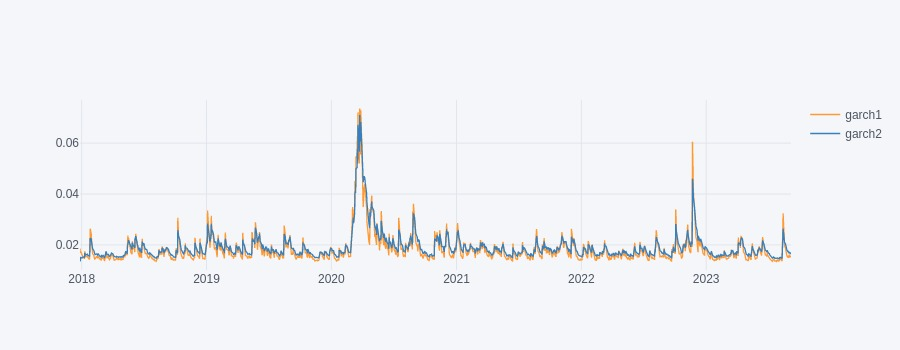

In [84]:
#########
tmp=pd.DataFrame()
tmp['garch1'] = conditional['vol']                      # manual
tmp['garch2'] = model_fitted.conditional_volatility     # pacote
tmp.iplot(dimensions=(900,350))
##########

In [85]:
vols = pd.DataFrame(columns=['ewma' , 'dp' , 'garch(1,1)' , 'longo prazo' , 'g-model'] , index = retornos.index)
vols['ewma'] = ewma['vol']
vols['dp'] = r_desviopadrao
vols['garch(1,1)'] = conditional['vol']
vols['longo prazo'] = long_run
vols['g-model']=model_fitted.conditional_volatility

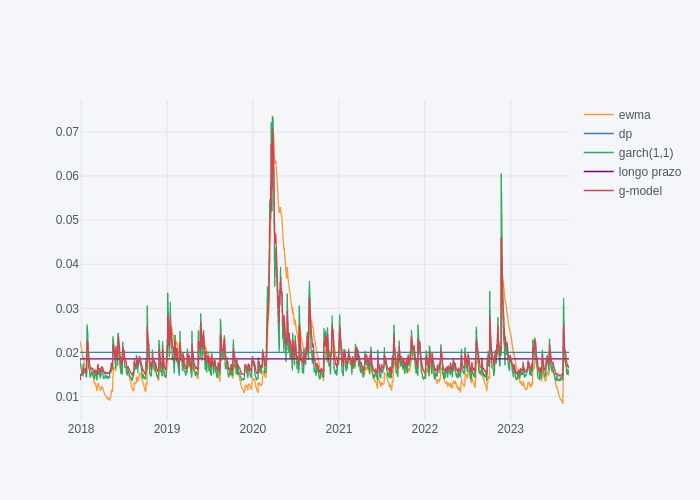

In [86]:
vols.iplot()

In [87]:
vols.round(decimals=3).iloc[::-1].head(3)

,ewma,dp,"garch(1,1)",longo prazo,g-model
Date,,,,,
2023-09-06,0.015,0.02,0.015,0.019,0.016
2023-09-05,0.015,0.02,0.016,0.019,0.017
2023-09-04,0.015,0.02,0.015,0.019,0.017



Volatilidade prevista

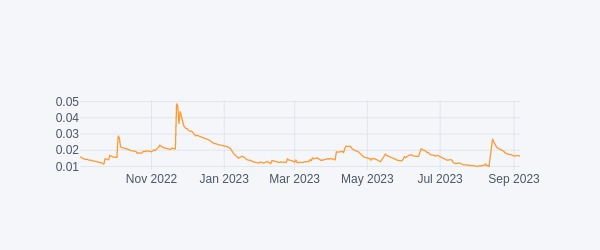

In [88]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = retornos['r_'+codigo][:-(test_size-i)]
    model = arch_model(train, mean='constant',vol='GARCH', p=1, q=1,dist='normal')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=retornos['r_'+codigo].index[-test_size:])
rolling_predictions.iplot(dimensions=(600,250))

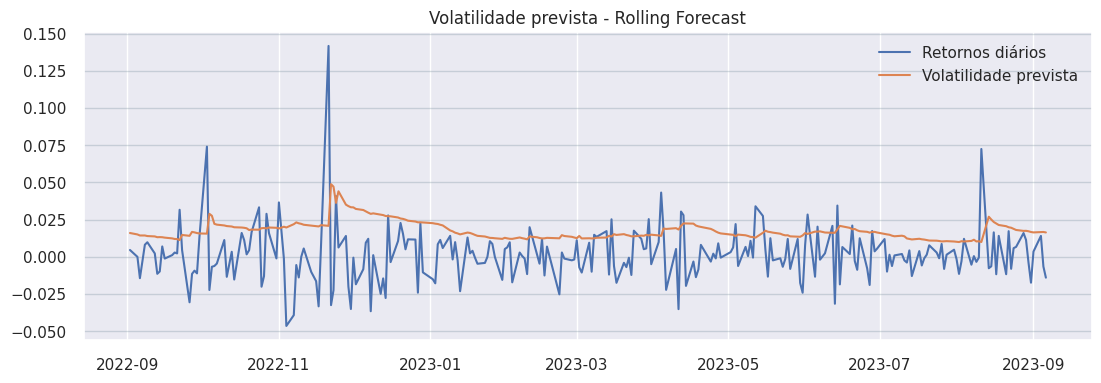

In [89]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
#ax.spines[['top','right']].set_visible(False)
plt.plot(retornos['r_'+codigo][-test_size:])
plt.plot(rolling_predictions)
plt.title('Volatilidade prevista - Rolling Forecast')
plt.legend(['Retornos diários', 'Volatilidade prevista'])


# Derivativos futuros

In [90]:
#@markdown carrega dados
url1 = 'https://www.tradergrafico.com.br/opcoes/'
#ptra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
#junta com a requests
r1 = requests.get(url1, headers=header)
# read_html do pandas põe a tabela num dataframe
dfs = pd.read_html(r1.text, decimal=',', thousands='.')[0]
dfs = dfs.rename(columns={0:'Ativo Obj' , 1:'Código' , 2:'Tipo' , 3:'Exercício (R$)' , 4: 'Último Fechamento' , 5:'Vencimento' , 6:'Modelo'})
dfs = dfs.drop(labels=0, axis=0)
dfs.dropna(axis = 0, how = 'all', inplace = True)
dfs['Ativo Obj'].fillna(method='ffill',inplace=True)
dfs[dfs['Ativo Obj']==codigo].style.hide_index()

Ativo Obj,Código,Tipo,Exercício (R$),Último Fechamento,Vencimento,Modelo
SAPR11,SAPRI200,Call,"UNT 19,23","R$ 3,80",15/09/2023,Americana
SAPR11,SAPRI204,Call,"UNT 20,48","R$ 2,55",15/09/2023,Europeia
SAPR11,SAPRI205,Call,"UNT 19,73","R$ 3,16",15/09/2023,Americana
SAPR11,SAPRI209,Call,"UNT 20,98","R$ 2,05",15/09/2023,Europeia
SAPR11,SAPRI215,Call,"UNT 20,73","R$ 2,24",15/09/2023,Americana
SAPR11,SAPRI235,Call,"UNT 22,73","R$ 0,40",15/09/2023,Americana
SAPR11,SAPRJ194,Call,"UNT 19,48","R$ 3,70",20/10/2023,Americana
SAPR11,SAPRJ199,Call,"UNT 19,98","R$ 3,03",20/10/2023,Americana
SAPR11,SAPRJ219,Call,"UNT 21,98","R$ 1,31",20/10/2023,Americana
SAPR11,SAPRJ234,Call,"UNT 23,48","R$ 0,38",20/10/2023,Americana


## Preço das opções por BS


Preço da Call $ = SN(d_1) - K e^{-rt}N(d_2)$ e

Preço da Put $ = Ke^{-rt}N(-d_2)-SN(-d_1)$

$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})t}{\sigma \cdot \sqrt{t}}$
e $d_2 = d_1 - \sigma \cdot \sqrt{t}$

S = Preço atual da ação; K = Preço de Strike; r = Taxa livre de risco (com capitalização composta);
σ =Variância (anual) do retorno contínuo da ação; t = Prazo (em anos) até a data de vencimento;
N(d) = Probabilidade de que uma variável aleatória padronizada e com distribuição normal, seja menor ou igual a d


In [91]:
def call_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*stats.norm.cdf(d1)-E*np.exp(-rf*T)*stats.norm.cdf(d2)


def put_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S*stats.norm.cdf(-d1)+E*np.exp(-rf*T)*stats.norm.cdf(-d2)


In [92]:
#data
vencimento = "2023-10-19"    #@param {type:"date"}
venc= datetime.strptime(vencimento, '%Y-%m-%d')

hoje= preco.index[-1]
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
# taxa livre risco
selic = quandl.get('BCB/432', start_date = inicio)
r =  np.log((selic.iloc[-1]/100).values[0]+1)
# preço
S = preco['Preço'].iloc[-1]
# volatilidade
sigma = vols['dp'].iloc[-1]*np.sqrt(252)
sigma = vols['g-model'].iloc[-1]*np.sqrt(252)


preços teóricos para 'vencimento'

In [93]:
# strikes

mm = (preco['Preço'][-21:-1].dropna()).mean()  #preço médio
ss = (preco['Preço'][-21:-1].dropna()).std()   #dp do preço
Ss= mm-3*ss
Sa= mm-2*ss
Sb= mm-1*ss
Sc= mm+1*ss
Sd= mm+2*ss
Se= mm+3*ss



bs_data = [
    [ '{:0.2f}'.format(Ss) , round(call_option_price(S,Ss, t, r, sigma),2)  ,round(put_option_price(S,Ss, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sa) , round(call_option_price(S,Sa, t, r, sigma),2)  ,round(put_option_price(S,Sa, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sb) , round(call_option_price(S,Sb, t, r, sigma),2)  ,round(put_option_price(S,Sb, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(mm) , round(call_option_price(S,mm, t, r, sigma),2)  ,round(put_option_price(S,mm, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(S)  , round(call_option_price(S,S , t, r, sigma),2)  ,round(put_option_price(S ,S, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sc) , round(call_option_price(S,Sc, t, r, sigma),2)  ,round(put_option_price(S,Sc, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sd) , round(call_option_price(S,Sd, t, r, sigma),2)  ,round(put_option_price(S,Sd, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Se) , round(call_option_price(S,Se, t, r, sigma),2)  ,round(put_option_price(S,Se, t, r, sigma),2) ]
]


BS = pd.DataFrame(bs_data , columns=['preço '+codigo, 'preço Call' , 'preço Put'] )
BS.style.hide_index()

preço SAPR11,preço Call,preço Put
20.31,2.660000,0.080000
20.97,2.100000,0.170000
21.64,1.590000,0.320000
22.30,1.160000,0.540000
22.58,1.000000,0.660000
22.97,0.800000,0.840000
23.63,0.530000,1.230000
24.30,0.340000,1.690000


In [94]:
#@markdown preço teórico a partir de outros parâmetros
#@markdown usando BS e Monte Carlo

# preço
S=67 #@param {type:"number"}
print('preço  do ativo',S)

# data
vencimento = "2023-10-19"    #@param {type:"date"}
hoje= preco.index[-1]
venc= datetime.strptime(vencimento, '%Y-%m-%d')
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
print("vencimento em "+str(res)+" dias (",t,"anos)")

# strike
strike=70.7  #@param {type:"number"}

# selic
juros = 13.25 #@param {type:"number"}
r=np.log(juros/100+1)
# vol
volatilidade ='EWMA'  #@param ['GARCH' , 'EWMA' ,'Desvio Padrao' ]

if volatilidade == 'GARCH'  :
	sigma = vols['g-model'].iloc[-1]*np.sqrt(252)
elif volatilidade == 'EWMA' :
	sigma = vols['ewma'].iloc[-1]*np.sqrt(252)
else : sigma = vols['ewma'].iloc[-1]*np.sqrt(252)

print("Preços dos derivativos pelo modelo Black-Scholes")
print("Call: ", round(call_option_price(S, strike, t, r, sigma),2))
print("Put: ", round(put_option_price(S, strike, t, r, sigma),2))


preço  do ativo 67
vencimento em 31 dias ( 0.12301587301587301 anos)
Preços dos derivativos pelo modelo Black-Scholes
Call:  1.16
Put:  3.79


In [95]:

# Monte Carlo
def call_option_simulation(S0,E,T,rf,sigma,iterations):
	option_data = np.zeros([iterations, 2])
	rand = np.random.normal(0, 1, [1, iterations])
	#equation for the S(t) stock price
	stock_price = S0*np.exp(T*(r - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
	#we need S-E because we have to calculate the max(S-E,0)
	option_data[:,1] = stock_price - E
	#average for the Monte-Carlo method
	#np.amax() returns the max(0,S-E) according to the formula
	average = np.sum(np.amax(option_data, axis=1))/float(iterations)
	#have to use the np.exp(-rT) discount factor
	return np.exp(-1.0*rf*T)*average

def put_option_simulation(S0,E,T,rf,sigma,iterations):
 option_data = np.zeros([iterations, 2])
 rand = np.random.normal(0, 1, [1, iterations])
 stock_price = S0*np.exp(T*(rf - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
 option_data[:,1] = E - stock_price
 average = np.sum(np.amax(option_data, axis=1))/float(iterations)
 return np.exp(-1.0*rf*T)*average


rodadas = 1000	#number of iterations in the Monte-Carlo simulation


print("Preços dos derivativos por simulação Monte Carlo")
print("Call: ", round(call_option_simulation(S,strike,t,r,sigma,rodadas),2))
print("Put: ", round(put_option_simulation(S,strike,t,r,sigma,rodadas),2))

Preços dos derivativos por simulação Monte Carlo
Call:  1.25
Put:  3.89
